In [1]:
%load_ext autoreload
%autoreload 2

#per la riproducibilità
%env CUBLAS_WORKSPACE_CONFIG=":4096:8"

import os
import itertools
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from IPython.display import Markdown as md
from multiprocessing import Pool
import time
from tqdm import tqdm
import networkx as nx
from networkx import stochastic_block_model


from graph_generation import GenerateGraph, perturb_nx_graph
from models import GCN, view_parameters, new_parameters, modify_parameters, Inits, new_parameters_linears
from train import Trainer, Dataset
from embedding import Embedding
from config_valid import Config, TrainingMode
import experiments
from experiments import Experiments, experiment_node_embedding, all_seeds
from plot_funcs import (plot_dim1, plot_dimN, plot_correlation_error, plot_metrics, plot_node_emb_1D, plot_node_emb_nD, scatter_node_emb, 
                        plot_graph_emb_1D, plot_graph_emb_nD, plot_data_degree_sequence, plot_corr_epoch, plot_ripetizioni_stesso_trial, 
                        plot_onlyloss_ripetizioni_stesso_trial,plot_onlyloss_ripetizioni_stesso_trial_superimposed, Data2Plot, plot_weights_multiple_hist)
from plot_model import plot_model
from utils import array_wo_outliers, plot_grafo, plot_grafo2
from Inspect import Inspect


import torch
from torch_geometric import nn
from torch_geometric.loader import DataLoader
device = torch.device('cuda')

from scipy import stats
from sklearn.metrics import log_loss

import pickle 
from plt_parameters import init_params, get_colors_to_cycle_rainbow8, get_colors_to_cycle_rainbowN
init_params()
rootsave = Path("output_plots/")

env: CUBLAS_WORKSPACE_CONFIG=":4096:8"


In [2]:
def make_video_parallel_static(my_list):
    experiments.graph_embedding_per_epoch = xp.trainer.graph_embedding_per_epoch
    experiments.node_embedding_per_epoch = xp.trainer.node_embedding_per_epoch
    experiments.dataset = xp.trainer.dataset
    experiments.loss_list = xp.trainer.test_loss_list
    experiments.exp_config = xp.trainer.config_class
    experiments.dataset_type = xp.trainer.gg.graphtype
    num_emb_neurons = xp.trainer.model.convs[-1].out_channels
    experiments.trainmode = xp.trainer.config_class.modo
    experiments.num_classes = xp.trainer.config_class.num_classes()
    experiments.embedding_dimension = num_emb_neurons
    #my_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,500, 15)) + list(range(500, 5000, 40))
    nomefile = xp.make_video(skip=1, fromfiles=True, custom_list=my_list, seq_colors=True)
    return nomefile

# Studio embedding 0 epoche (freezed GCN) $\sim$ training con Linear

## Erdos Renyi

In [2]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['list_p'] = [0.2, 0.01]    
c.conf['model']['neurons_last_linear'] = [10, 10, 2]
xp = Experiments(config_file, diz_trials=None, rootsave=rootsave, config_class=c)
xp.just_train(parallel=True)

In [3]:
embedding_class = xp.embedding()

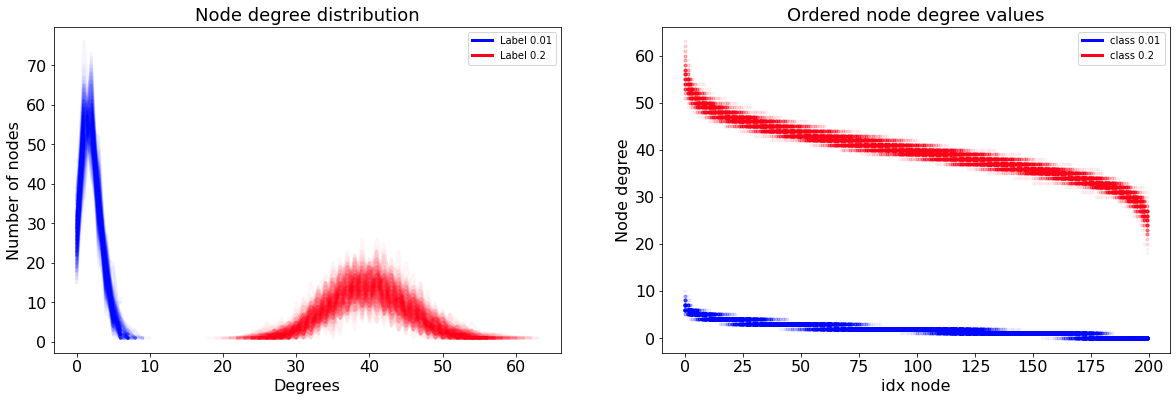

Plotting 2D or n>=2 embeddings...


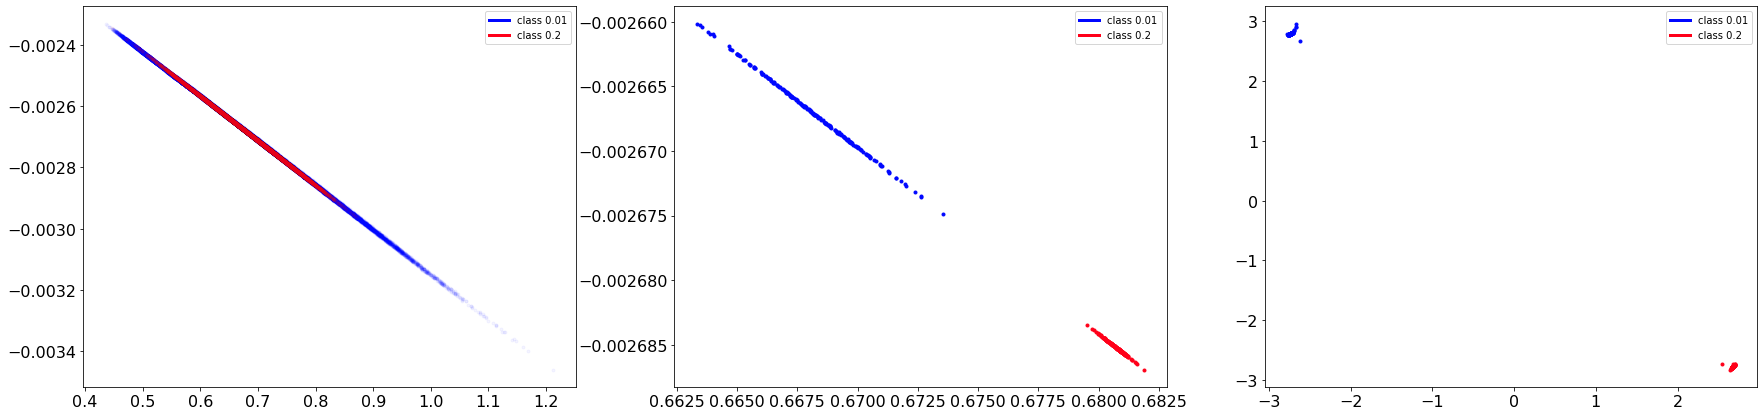

In [7]:
plot_data_degree_sequence(embedding_class.emb_perclass, log=False)
num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
plot_metrics(embedding_class, num_emb_neurons, trainmode)

In [16]:
experiments.graph_embedding_per_epoch = xp.trainer.graph_embedding_per_epoch
experiments.node_embedding_per_epoch = xp.trainer.node_embedding_per_epoch
experiments.dataset = xp.trainer.dataset
experiments.loss_list = xp.trainer.test_loss_list
experiments.exp_config = xp.trainer.config_class
experiments.dataset_type = xp.trainer.gg.type
my_log_list = my_log_lista=list(range(20)) + list(range(20,100,5)) + list(range(100,250, 20)) + list(range(250, 500, 50))
len(my_log_list)

49

In [17]:
nomefile = xp.make_video(skip=1, fromfiles=True, custom_list=my_log_list)

scatter_exp[0.2_0.01]_nodi200_grafi400_percent0.7_mode1_layers[1_32_32_2]_finaldenseTrue_freezedFalse


<img src="scatter_exp[0.2_0.01]_nodi200_grafi400_percent0.7_mode1_layers[1_32_32_2]_finaldenseTrue_freezedFalse.gif" width="1200" align="center">

### dim = 1

In [2]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['list_p'] = [0.2, 0.01]    
c.conf['model']['GCNneurons_per_layer'] = [1, 32, 32, 1]
c.conf['model']['neurons_last_linear'] = [10, 10, 2]
xp = Experiments(config_file, diz_trials=None, rootsave=rootsave, config_class=c)
xp.just_train(parallel=True)

Generating dataset...
Mean connectivity for each node: 39.826 p=0.2
Mean connectivity for each node: 1.993 p=0.01
Dataset generated
Loading Dataset...


100%|███████████████████████████████████████████████████████████████████| 400/400 [00:08<00:00, 47.61it/s]


Tempo impiegato: 8.443427324295044


100%|███████████████████████████████████████████████████████████████████| 500/500 [01:15<00:00,  6.65it/s]

test accuracy finale: 1.0


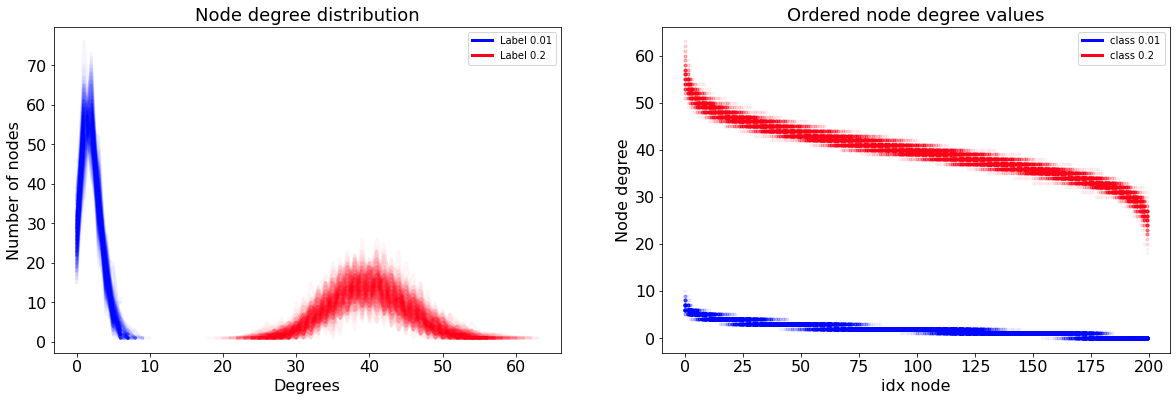

Plotting 1D embeddings...


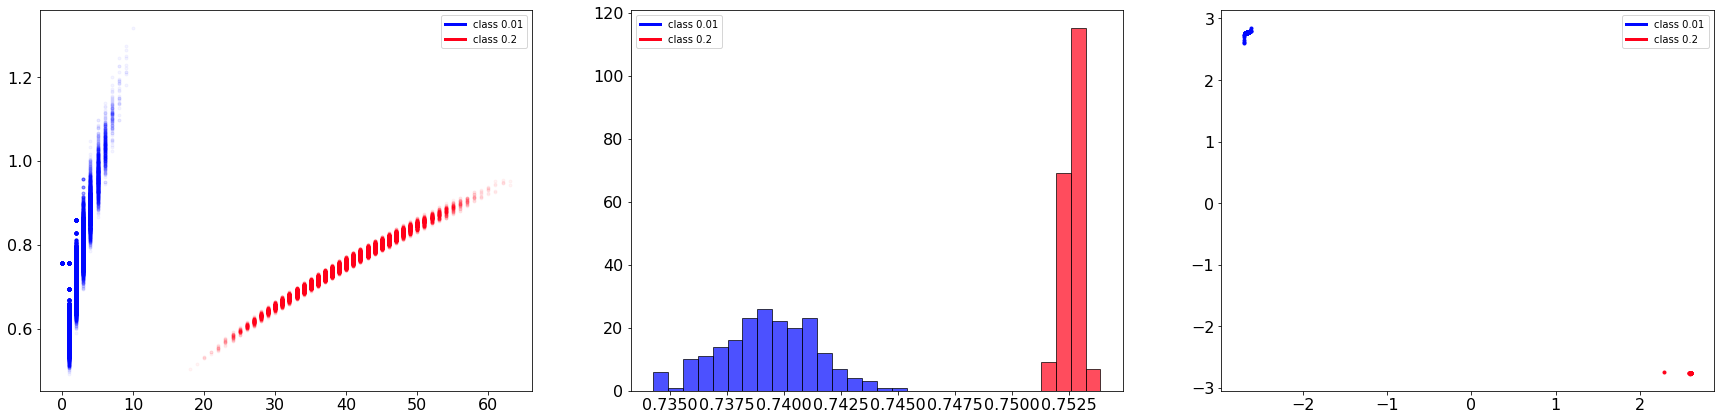

In [44]:
embedding_class = xp.embedding()
plot_data_degree_sequence(embedding_class.emb_perclass, log=False)
num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
plot_metrics(embedding_class, num_emb_neurons, trainmode)

In [45]:
experiments.graph_embedding_per_epoch = xp.trainer.graph_embedding_per_epoch
experiments.node_embedding_per_epoch = xp.trainer.node_embedding_per_epoch
experiments.dataset = xp.trainer.dataset
experiments.loss_list = xp.trainer.test_loss_list
experiments.exp_config = xp.trainer.config_class
experiments.dataset_type = xp.trainer.gg.type
experiments.embedding_dimension = num_emb_neurons
my_log_list = my_log_lista=list(range(20)) + list(range(20,100,5)) + list(range(100,250, 20)) + list(range(250, 500, 50))
len(my_log_list)
nomefile = xp.make_video(skip=1, fromfiles=True, custom_list=my_log_list)

scatter_exp[0.2_0.01]_nodi200_grafi400_percent0.7_mode1_layers[1_32_32_1]_finaldenseTrue_freezedFalse


In [46]:
md(f'<img src={nomefile}.gif width="1200" align="center">')

<img src=scatter_exp[0.2_0.01]_nodi200_grafi400_percent0.7_mode1_layers[1_32_32_1]_finaldenseTrue_freezedFalse.gif width="1200" align="center">

<img src="scatter_exp[0.2_0.01]_nodi200_grafi400_percent0.7_mode1_layers[1_32_32_2]_finaldenseTrue_freezedFalse.gif" width="1200" align="center">

### Più classi

In [5]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['Num_nodes'] = 450
c.conf['graph_dataset']['Num_grafi_per_tipo'] = 40
c.conf['model']['GCNneurons_per_layer'] = [1, 64, 32, 1]
num_out_neurons = len(c.conf['graph_dataset']['list_p'])
c.conf['model']['neurons_last_linear'] = [6, num_out_neurons]
c.conf['model']['freezeGCNlayers'] = False
c.conf['training']['epochs'] = 1000
xp = Experiments(config_file, diz_trials=None, rootsave=rootsave, config_class=c)
xp.just_train(parallel=True)
embedding_class = xp.embedding()

Generating dataset...
Mean connectivity for each node: 134.674 p=0.3
Mean connectivity for each node: 89.701 p=0.2
Mean connectivity for each node: 44.94 p=0.1
Mean connectivity for each node: 22.462 p=0.05
Mean connectivity for each node: 4.511 p=0.01
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:24<00:00,  8.01it/s]


Tempo impiegato: 25.041494846343994


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [04:21<00:00,  3.82it/s]

test accuracy finale: 0.23333333333333334


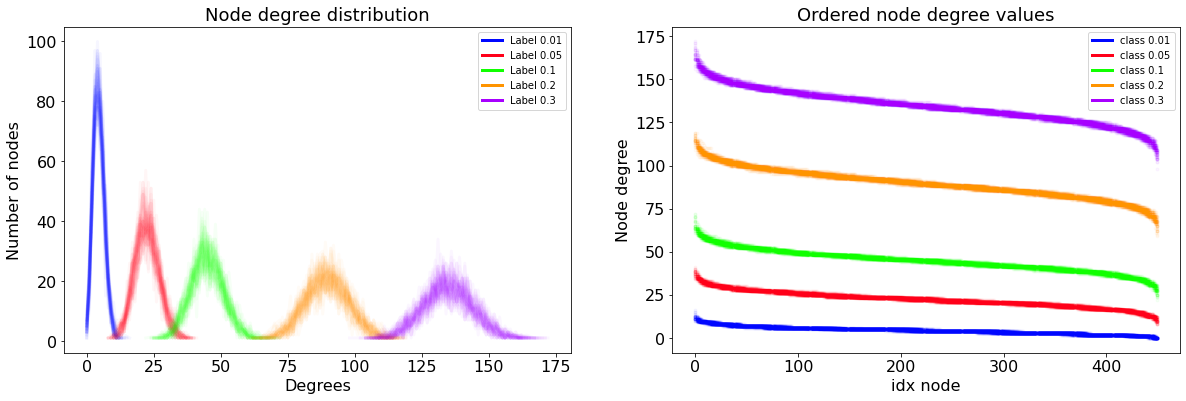

Plotting 1D embeddings...


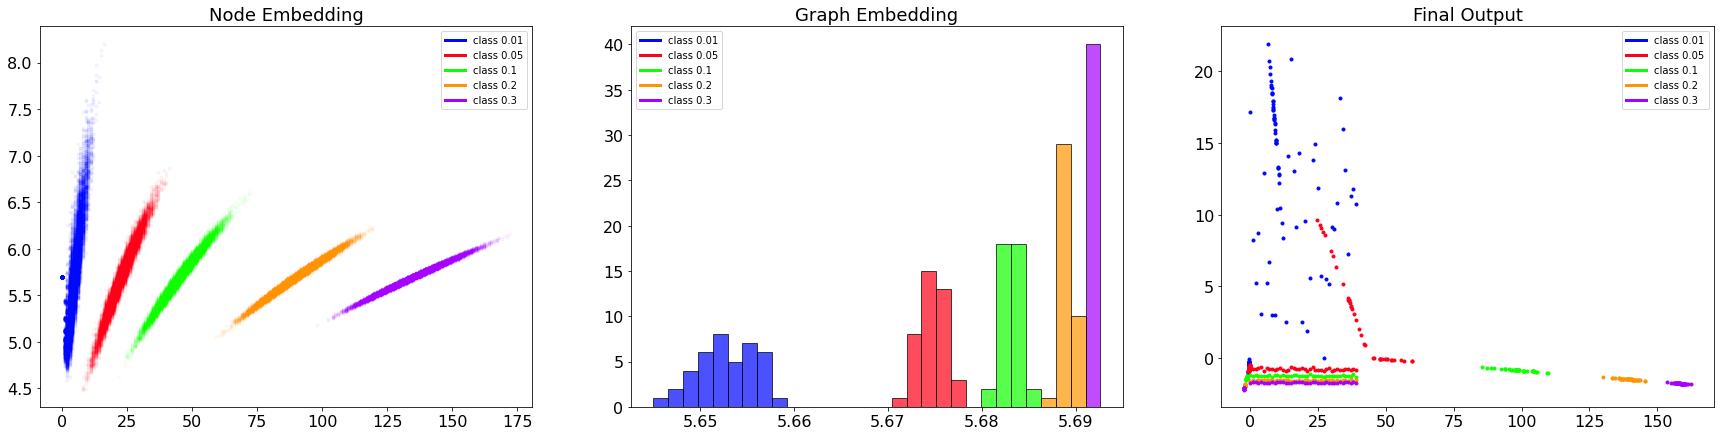

In [6]:
plot_data_degree_sequence(embedding_class.emb_perclass, log=False)
num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
plot_metrics(embedding_class, num_emb_neurons, trainmode)

In [7]:
my_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,500, 10)) + list(range(500, 1000, 20))
nomefile = make_video_parallel_static(my_list=my_list)
md(f'<img src={nomefile}.gif width="1200" align="center">')

(1001, 90000, 1)
scatter_exp[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers[1_64_32_1]-[6_5]_freezedFalse


<img src=scatter_exp[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers[1_64_32_1]-[6_5]_freezedFalse.gif width="1200" align="center">

### init weight non eye

In [3]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['Num_nodes'] = 450
c.conf['graph_dataset']['Num_grafi_per_tipo'] = 40
c.conf['model']['GCNneurons_per_layer'] = [1, 32, 1]
num_out_neurons = len(c.conf['graph_dataset']['list_p'])
c.conf['model']['neurons_last_linear'] = [16, 16, num_out_neurons]
c.conf['model']['freezeGCNlayers'] = False
c.conf['model']['init_weights'] = 'xavier_normal'
c.conf['training']['epochs'] = 100000
xp = Experiments(config_file, diz_trials=None, rootsave=rootsave, config_class=c)
xp.just_train(parallel=True)
embedding_class = xp.embedding()
my_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,500, 10)) + list(range(500, 1000, 20))
nomefile = make_video_parallel_static(my_list=my_list)
md(f'<img src={nomefile}.gif width="1200" align="center">')

Generating dataset...
Mean connectivity for each node: 134.674 p=0.3
Mean connectivity for each node: 89.701 p=0.2
Mean connectivity for each node: 44.94 p=0.1
Mean connectivity for each node: 22.462 p=0.05
Mean connectivity for each node: 4.511 p=0.01
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:25<00:00,  7.97it/s]


Tempo impiegato: 25.171868085861206


  1%|▊                                                                     | 1193/100000 [03:11<4:24:03,  6.24it/s]


Early stopping!!!
test accuracy finale: 1.0
(1195, 90000, 1)
scatter_exp[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers[1_32_1]-[16_16_5]_freezedFalse


<img src=scatter_exp[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers[1_32_1]-[16_16_5]_freezedFalse.gif width="1200" align="center">

Generating dataset...
Mean connectivity for each node: 134.674 p=0.3
Mean connectivity for each node: 89.701 p=0.2
Mean connectivity for each node: 44.94 p=0.1
Mean connectivity for each node: 22.462 p=0.05
Mean connectivity for each node: 4.511 p=0.01
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:24<00:00,  8.08it/s]


Tempo impiegato: 24.810115814208984


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [04:39<00:00,  3.57it/s]


test accuracy finale: 0.4
(1001, 90000, 1)
scatter_exp[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers[1_64_32_1]-[6_5]_freezedFalse


<img src=scatter_exp[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers[1_64_32_1]-[6_5]_freezedFalse.gif width="1200" align="center">

### ER dim=2

In [39]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['Num_nodes'] = 450
c.conf['graph_dataset']['Num_grafi_per_tipo'] = 40
c.conf['model']['GCNneurons_per_layer'] = [1, 32, 2]
num_out_neurons = len(c.conf['graph_dataset']['list_p'])
c.conf['model']['neurons_last_linear'] = [16, 16, num_out_neurons]
c.conf['model']['freezeGCNlayers'] = False
#c.conf['model']['init_weights'] = 'xavier_normal'
c.conf['training']['epochs'] = 1000

xp = Experiments(config_file, diz_trials=None, rootsave=rootsave, config_class=c)
xp.just_train(parallel=True)
embedding_class = xp.embedding()
num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo


Generating dataset...
Mean connectivity for each node: 134.674 p=0.3
Mean connectivity for each node: 89.701 p=0.2
Mean connectivity for each node: 44.94 p=0.1
Mean connectivity for each node: 22.462 p=0.05
Mean connectivity for each node: 4.511 p=0.01
Dataset generated
Loading Dataset...


100%|███████████████████████████████████████████████████████████████████| 200/200 [00:24<00:00,  8.11it/s]


Tempo impiegato: 24.733182191848755


100%|███████████████████████████████████████████████████████████████████| 500/500 [01:40<00:00,  4.99it/s]


test accuracy finale: 0.97


In [6]:
import skdim
metodo = skdim.id.lPCA()
metodo = skdim.id.DANCo()
metodo = skdim.id.CorrInt()
metodo = skdim.id.FisherS()
metodo = skdim.id.TwoNN()
metodo.fit(embedding_class.graph_embedding_array)

TwoNN()

In [7]:
metodo.dimension_

0.9543166350004064

In [40]:
embedding_class.get_metrics(num_emb_neurons, trainmode)
my_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,500, 10)) + list(range(500, xp.trainer.last_epoch, 20))
nomefile = make_video_parallel_static(my_list=my_list)
md(f'<img src={nomefile}.gif width="1200" align="center">')

(501, 90000, 2)
Preparing data for make video...
(6.26 s.)  ...data ready: make video...(21.77 s.)
GraphType.ER_[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers§1-32-2+16-16-5§_lr0.01_freezedFalse


<img src=GraphType.ER_[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers§1-32-2+16-16-5§_lr0.01_freezedFalse.gif width="1200" align="center">

(1001, 90000, 2)
Preparing data for make video...
(10.61 s.)  ...data ready: make video...(22.63 s.)
GraphType.ER_[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers§1-32-2+16-16-5§_lr0.01_freezedFalse


<img src=GraphType.ER_[0.3_0.2_0.1_0.05_0.01]_nodi450_grafi80_mode1_layers§1-32-2+16-16-5§_lr0.01_freezedFalse.gif width="1200" align="center">

In [11]:
import skdim

In [57]:
all_emb = embedding_class.node_embedding_array
node_emb_perclass_pergraph = np.array(embedding_class.get_all_node_emb_per_class())
node_emb_perclass = node_emb_perclass_pergraph.reshape(5,-1,2)
print(node_emb_perclass.shape, node_emb_perclass_pergraph.shape)
all_graph_emb = embedding_class.graph_embedding_array 

(5, 18000, 2) (5, 40, 450, 2)


In [ ]:
twonn = skdim.id.TwoNN()
dims = []
for n in node_emb_perclass:
    dim = twonn.fit(n).dimension_
    dims.append(dim)
    plt.plot(twonn.x_, twonn.y_)

In [ ]:
for i,n in enumerate(node_emb_perclass):
    plt.plot(n[:,0], n[:,1], linestyle='None', marker='.')

In [60]:
twonn = skdim.id.TwoNN().fit(all_graph_emb)

In [65]:
graph_emb_perclass = np.array(embedding_class.get_all_graph_emb_per_class())

In [66]:
graph_emb_perclass.shape

(5, 40, 2)

In [ ]:
plt.plot(*all_graph_emb.T)

In [128]:
gpe = xp.trainer.graph_embedding_per_epoch
npe = xp.trainer.node_embedding_per_epoch
out_array = xp.trainer.output_per_epoch

In [256]:
j = 4 #482
embepoch = Embedding(gpe[j], npe[j], xp.trainer.dataset, xp.trainer.config_class, out_array[j])
embepoch.get_emb_per_graph()  # riempie node_emb_pergraph
embepoch.separate_embedding_by_classes()

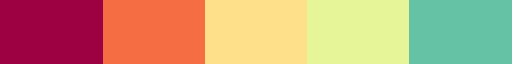

In [278]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from plt_parameters import get_colors_to_cycle_sequential
mpl.colors.ListedColormap(get_colors_to_cycle_sequential(5), name='from_list', N=None)

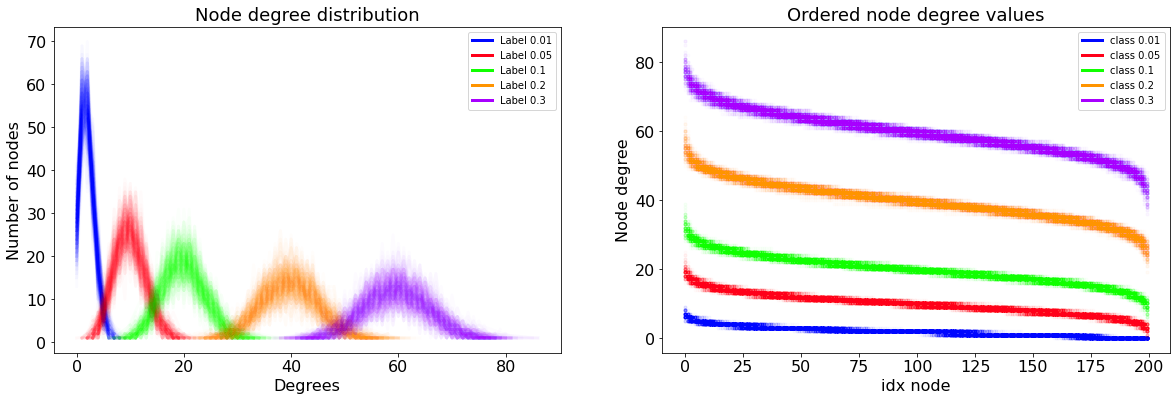

Plotting 2D or n>=2 embeddings...
1000 1000


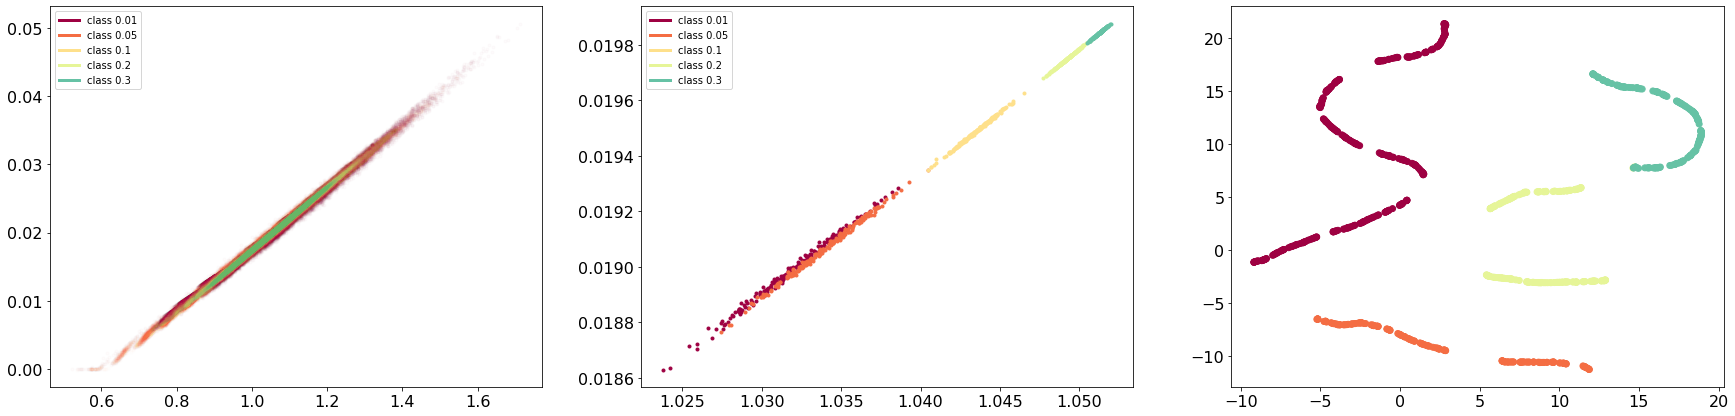

In [287]:
plot_data_degree_sequence(embepoch.emb_perclass, log=False)
num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
plot_metrics(embepoch, num_emb_neurons, trainmode)

## Power law

### dim = 1

In [3]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['ERmodel'] = False
c.conf['graph_dataset']['confmodel'] = True
c.conf['graph_dataset']['Num_nodes'] = [450]*10
c.conf['graph_dataset']['Num_grafi_per_tipo'] = 40
c.conf['model']['GCNneurons_per_layer'] = [1, 64, 32, 1]
num_out_neurons = len(c.conf['graph_dataset']['list_exponents'])
c.conf['model']['neurons_last_linear'] = [6, num_out_neurons]
c.conf['model']['freezeGCNlayers'] = False
c.conf['training']['epochs'] = 1000
c.conf['training']['every_epoch_embedding'] = True
xp = Experiments(config_file, diz_trials=None, rootsave=rootsave, config_class=c)
xp.just_train(parallel=True)
embedding_class = xp.embedding()

Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:08<00:00, 45.76it/s]


Tempo impiegato: 8.809556007385254


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:28<00:00,  4.80it/s]

test accuracy finale: 0.8166666666666667


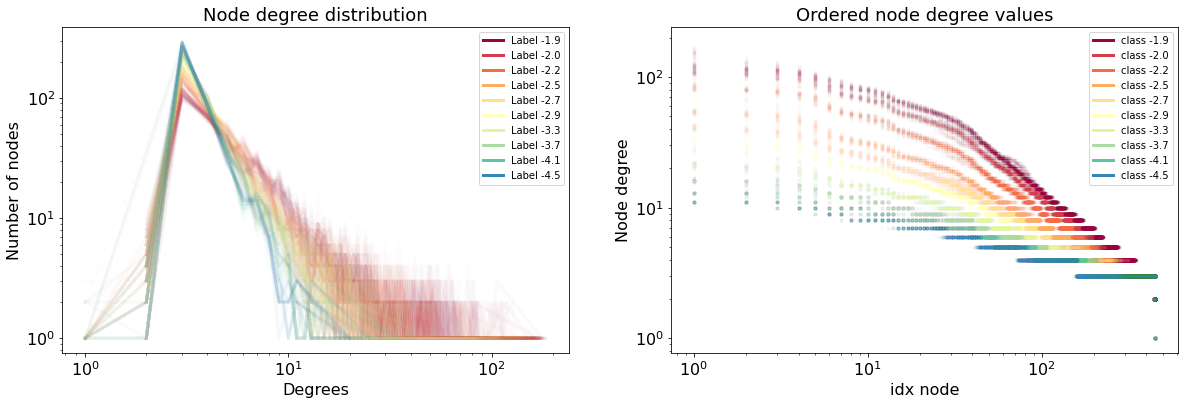

Plotting 1D embeddings...


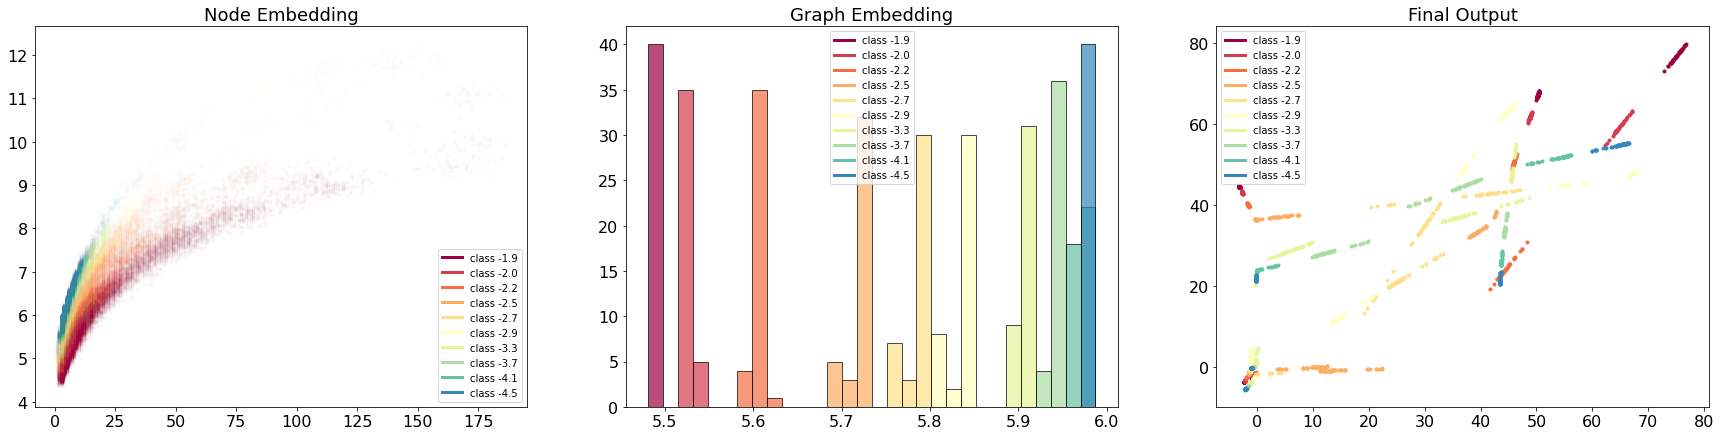

In [4]:
plot_data_degree_sequence(embedding_class.emb_perclass, sequential_colors=True, log=True)
num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
plot_metrics(embedding_class, num_emb_neurons, trainmode, sequential_colors=True)

In [19]:
my_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,500, 15)) + list(range(500, 1000, 40))
nomefile = make_video_parallel_static(my_list=my_list)

(1001, 180000, 1)


/home/daniele/Documenti/Progetti/Networks/Embednet/experiments.py:565: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.cla()
/home/daniele/Documenti/Progetti/Networks/Embednet/experiments.py:565: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.cla()
/home/daniele/Documenti/Progetti/Networks/Embednet/experiments.py:565: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.cla()
/home/daniele/Documenti/Progetti/Networks/Embednet/experiments.py:565: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.cla()
/home/daniele/Documenti/Progetti/Networks/Embednet/experiments.py:565: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.cla()
/home/daniele/Documenti/Progetti/Networks/Embednet/experiments.py:565: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  pl

scatter_exp10_nodi450_grafi80_mode1_layers[1_64_32_1]-[6_10]_freezedFalse


In [20]:
md(f'<img src={nomefile}.gif width="1200" align="center">')

<img src=scatter_exp10_nodi450_grafi80_mode1_layers[1_64_32_1]-[6_10]_freezedFalse.gif width="1200" align="center">

### init weight non eye

In [3]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['ERmodel'] = False
c.conf['graph_dataset']['confmodel'] = True
c.conf['graph_dataset']['Num_nodes'] = [450]*10
c.conf['graph_dataset']['Num_grafi_per_tipo'] = 40
c.conf['model']['GCNneurons_per_layer'] = [1, 64, 32, 1]
num_out_neurons = len(c.conf['graph_dataset']['list_exponents'])
c.conf['model']['neurons_last_linear'] = [6, num_out_neurons]
c.conf['model']['freezeGCNlayers'] = False
c.conf['model']['init_weights'] = 'xavier_normal'
c.conf['training']['epochs'] = 1000
c.conf['training']['every_epoch_embedding'] = True
xp = Experiments(config_file, diz_trials=None, rootsave=rootsave, config_class=c)
xp.just_train(parallel=True)
embedding_class = xp.embedding()

Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:08<00:00, 44.67it/s]


Tempo impiegato: 9.036906242370605


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:35<00:00,  4.65it/s]

test accuracy finale: 0.9833333333333333


In [5]:
my_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,500, 10)) + list(range(500, 1000, 20))
nomefile = make_video_parallel_static(my_list=my_list)
md(f'<img src={nomefile}.gif width="1200" align="center">')

(1001, 180000, 1)
scatter_exp10_nodi450_grafi80_mode1_layers[1_64_32_1]-[6_10]_freezedFalse


<img src=scatter_exp10_nodi450_grafi80_mode1_layers[1_64_32_1]-[6_10]_freezedFalse.gif width="1200" align="center">

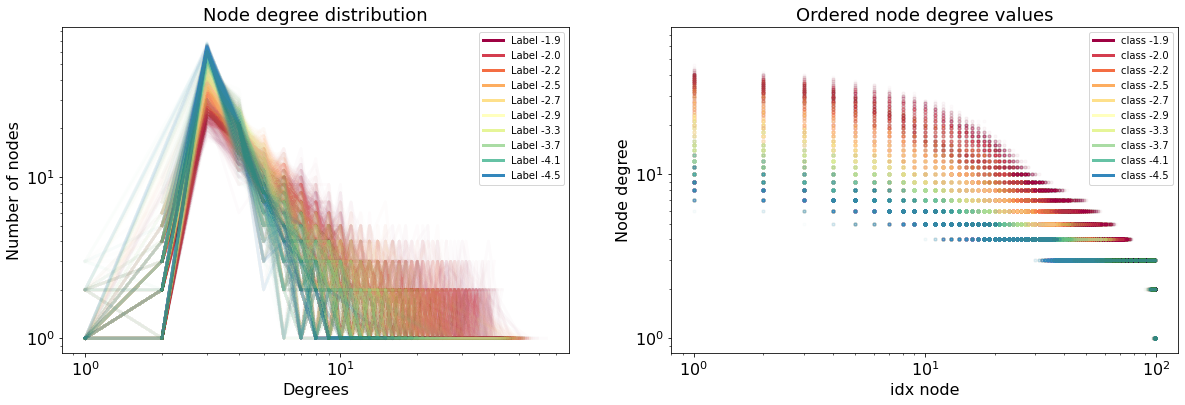

Plotting 1D embeddings...


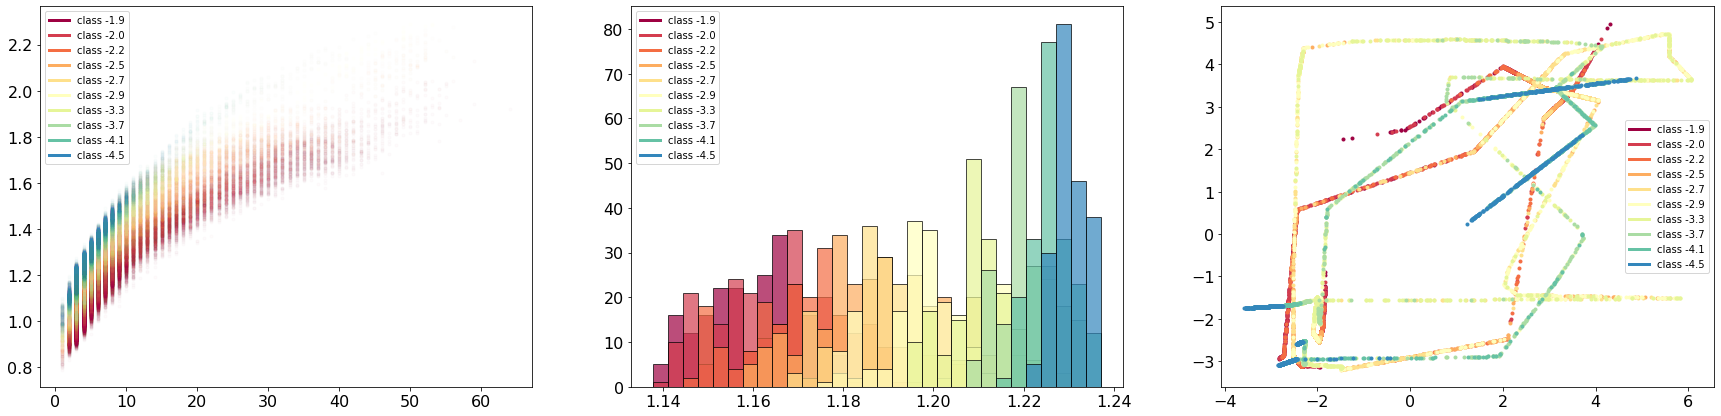

In [9]:
experiments.graph_embedding_per_epoch = xp.trainer.graph_embedding_per_epoch
experiments.node_embedding_per_epoch = xp.trainer.node_embedding_per_epoch
experiments.dataset = xp.trainer.dataset
experiments.loss_list = xp.trainer.test_loss_list
experiments.exp_config = xp.trainer.config_class
experiments.dataset_type = xp.trainer.gg.type
experiments.embedding_dimension = num_emb_neurons
my_log_list = my_log_lista=list(range(20)) + list(range(20,100,5)) + list(range(100,250, 20)) + list(range(250, 500, 50))
len(my_log_list)
nomefile = xp.make_video(skip=1, fromfiles=True, custom_list=my_log_list, seq_colors=True)

scatter_exp10_nodi100_grafi400_percent0.7_mode1_layers[1_32_32_1]_finaldenseTrue_freezedFalse


In [10]:
md(f'<img src={nomefile}.gif width="1200" align="center">')

<img src=scatter_exp10_nodi100_grafi400_percent0.7_mode1_layers[1_32_32_1]_finaldenseTrue_freezedFalse.gif width="1200" align="center">

### dim = 2  non ce la fa dopo 10k epoche   $\rightarrow$ perché 200 nodi erano pochi
##### dim = 32 non ce la fa comunque
450 nodi, 40 grafi, dim 2 si

In [3]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['ERmodel'] = False
c.conf['graph_dataset']['confmodel'] = True
c.conf['graph_dataset']['Num_nodes'] = [450]*10
c.conf['graph_dataset']['Num_grafi_per_tipo'] = 40
#c.conf['graph_dataset']['list_exponents'] = [-2.5, -2.7, -2.9, -3.3, -3.7, -4.1, -4.5]
c.conf['model']['GCNneurons_per_layer'] = [1, 64, 32, 2]
num_out_neurons = len(c.conf['graph_dataset']['list_exponents'])
c.conf['model']['neurons_last_linear'] = [6, num_out_neurons]
c.conf['model']['freezeGCNlayers'] = False
c.conf['training']['epochs'] = 1000
#c.conf['training']['learning_rate'] = 0.005
c.conf['training']['every_epoch_embedding'] = True
xp = Experiments(config_file, diz_trials=None, rootsave=rootsave, config_class=c)
xp.just_train(parallel=True)
embedding_class = xp.embedding()

Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:09<00:00, 43.52it/s]


Tempo impiegato: 9.253096103668213


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:40<00:00,  4.53it/s]

test accuracy finale: 0.8416666666666667


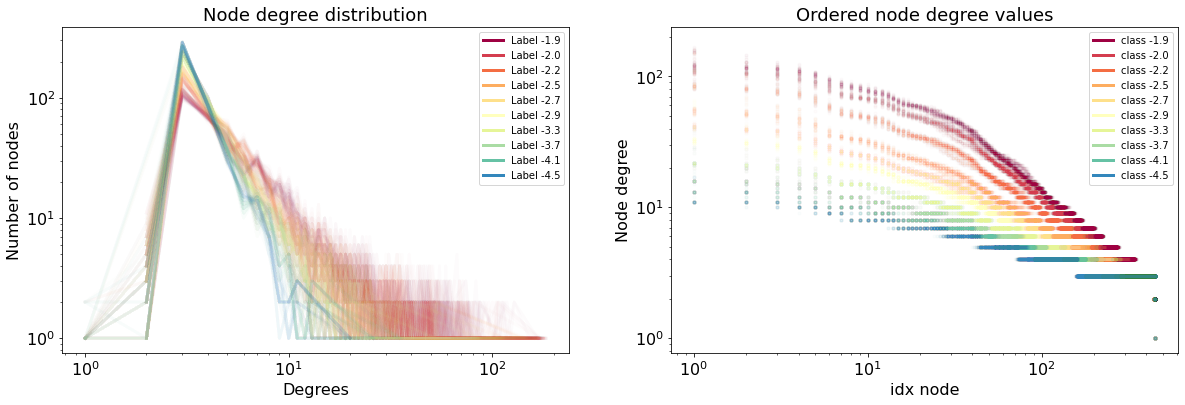

Plotting 2D or n>=2 embeddings...


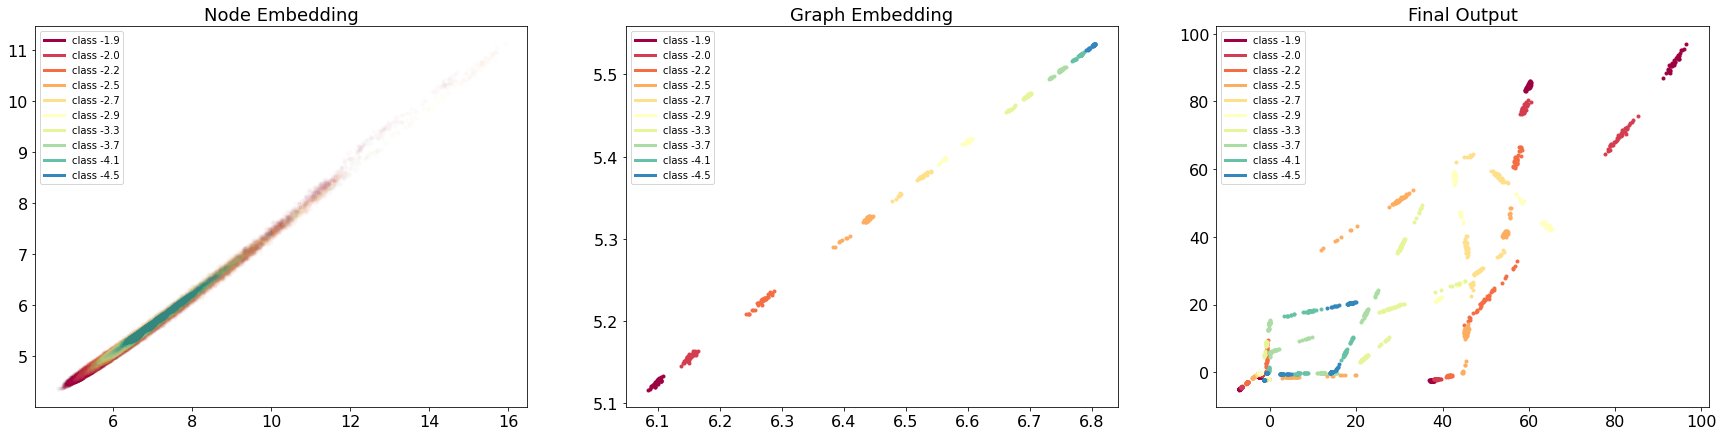

In [5]:
plot_data_degree_sequence(embedding_class.emb_perclass, sequential_colors=True, log=True)
num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
plot_metrics(embedding_class, num_emb_neurons, trainmode, sequential_colors=True)

In [ ]:
my_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,500, 15)) + list(range(500, 1000, 40))
start = time.time()
nomefile = make_video_parallel_static(my_list=my_list)
end = time.time()
print(end-start)

In [66]:
md(f'<img src={nomefile}.gif width="1200" align="center">')

<img src=scatter_exp10_nodi450_grafi80_mode1_layers[1_64_32_2]-[6_10]_freezedFalse.gif width="1200" align="center">

### vedo alle prime epoche

[0.4421712040901184, 2.667777490615845, -0.01991335231723497, 0.218605700135231]
[0.9215470254421234, 1.501217097043991, -0.012751470506191255, 0.14026617556810378]
[-5.678656721115113, 48.19555320739746, -2.9225380420684814, 18.080345153808594]


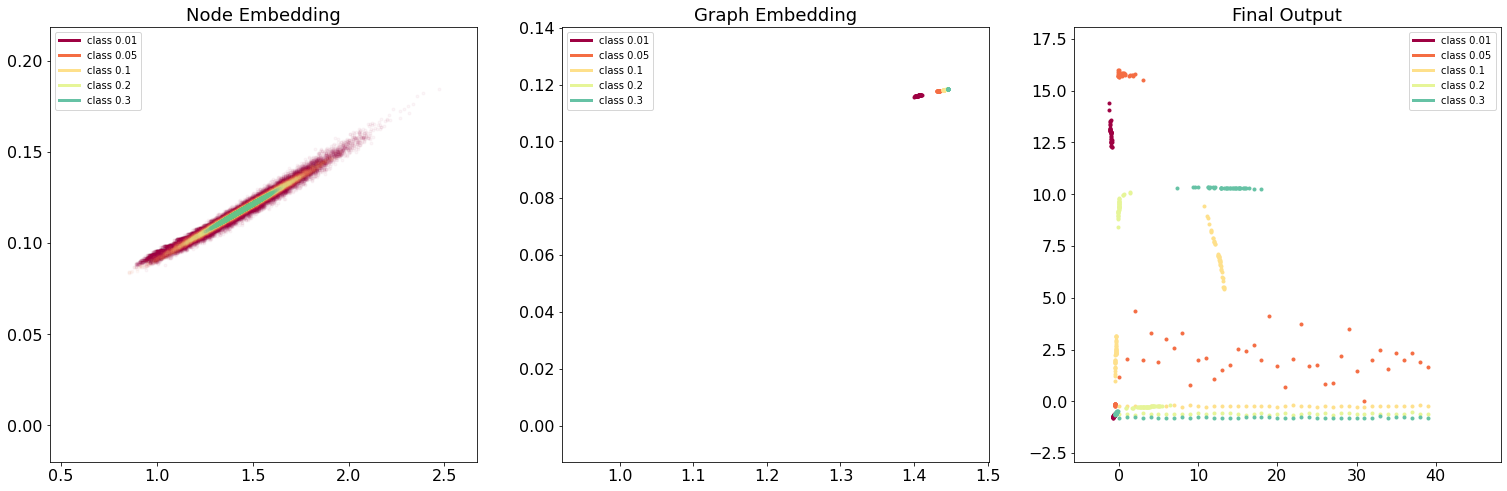

In [33]:
i = 470
graph_embeddings_array = xp.trainer.graph_embedding_per_epoch[i]
node_embeddings_array = xp.trainer.node_embedding_per_epoch[i]
output_array = xp.trainer.output_per_epoch[i]
embedding_class_e = Embedding(graph_embeddings_array, node_embeddings_array, xp.trainer.dataset, xp.trainer.config_class, output_array)
embedding_class_e.get_emb_per_graph()  # riempie node_emb_pergraph
embedding_class_e.separate_embedding_by_classes()
embedding_dimension = xp.trainer.model.convs[-1].out_channels
data = Data2Plot(embedding_class_e.emb_perclass, dim=embedding_dimension )

def axis_bounds(embedding):
    left, right = embedding.T[0].min(), embedding.T[0].max()
    bottom, top = embedding.T[1].min(), embedding.T[1].max()
    adj_h, adj_v = (right - left) * 0.1, (top - bottom) * 0.1
    return [left - adj_h, right + adj_h, bottom - adj_v, top + adj_v]


sequential_colors = True
fig, axes = plt.subplots(1, 3, figsize=(26, 8))
if embedding_dimension == 1:
    data.plot(datatype='node_embedding', type='scatter', ax=axes[0], sequential_colors=sequential_colors, title="Node Embedding")
    data.plot(datatype='graph_embedding', type='histogram', ax=axes[1], sequential_colors=sequential_colors, title="Graph Embedding")
    data.plot(datatype='final_output', type='plot', ax=axes[2], sequential_colors=sequential_colors, title="Final Output")
else:
    data.plot(datatype='node_embedding', type='plot', ax=axes[0], sequential_colors=sequential_colors, title="Node Embedding")#, ylim=(-0.000000003, 0.000))
    ax_bound = axis_bounds(np.array(xp.trainer.node_embedding_per_epoch))
    print(ax_bound)
    axes[0].axis(ax_bound)
    data.plot(datatype='graph_embedding', type='plot', ax=axes[1], sequential_colors=sequential_colors, title="Graph Embedding")
    ax_bound = axis_bounds(np.array(xp.trainer.graph_embedding_per_epoch))  
    print(ax_bound)
    axes[1].axis(ax_bound)
    data.plot(datatype='final_output', type='plot', ax=axes[2], sequential_colors=sequential_colors, title="Final Output")
    ax_bound = axis_bounds(np.array(xp.trainer.output_per_epoch))
    print(ax_bound)
    axes[2].axis(ax_bound)



In [49]:
np.vstack(data.array2plot).

(400, 10)

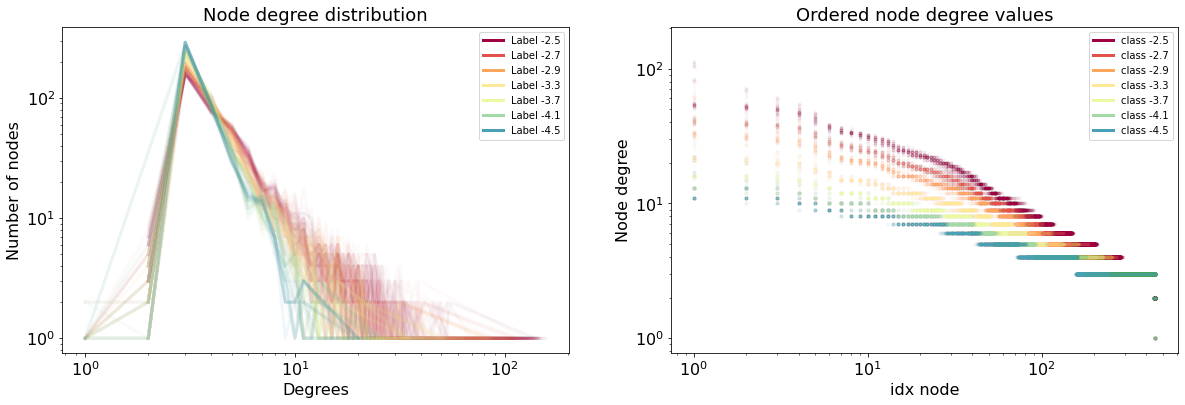

Plotting 2D or n>=2 embeddings...


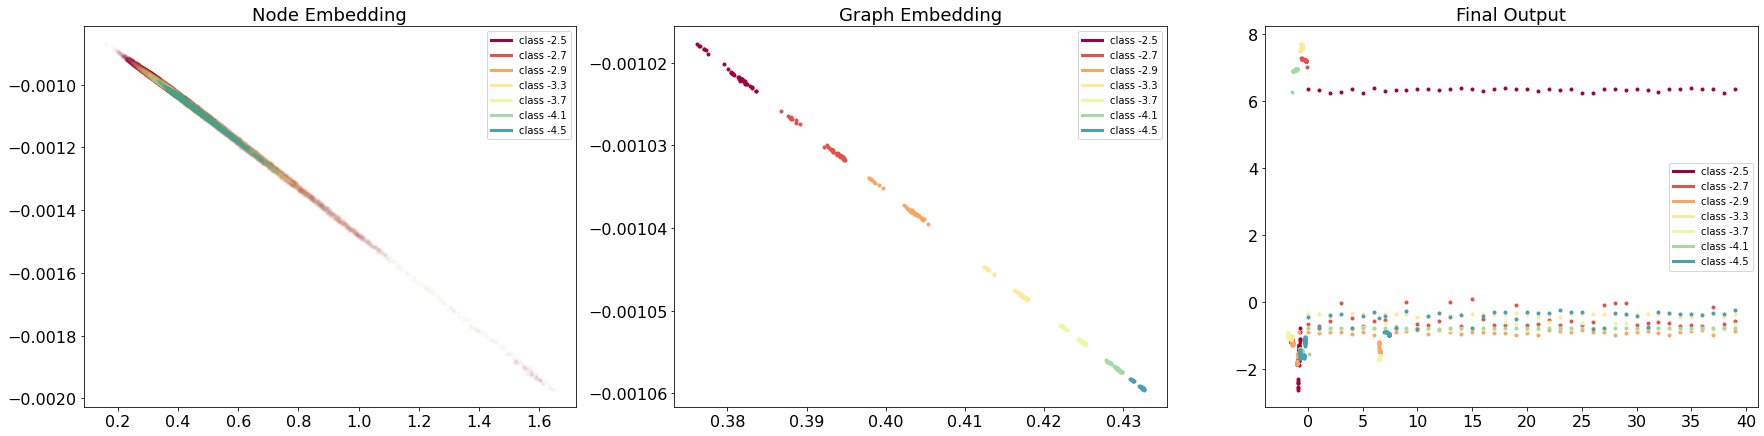

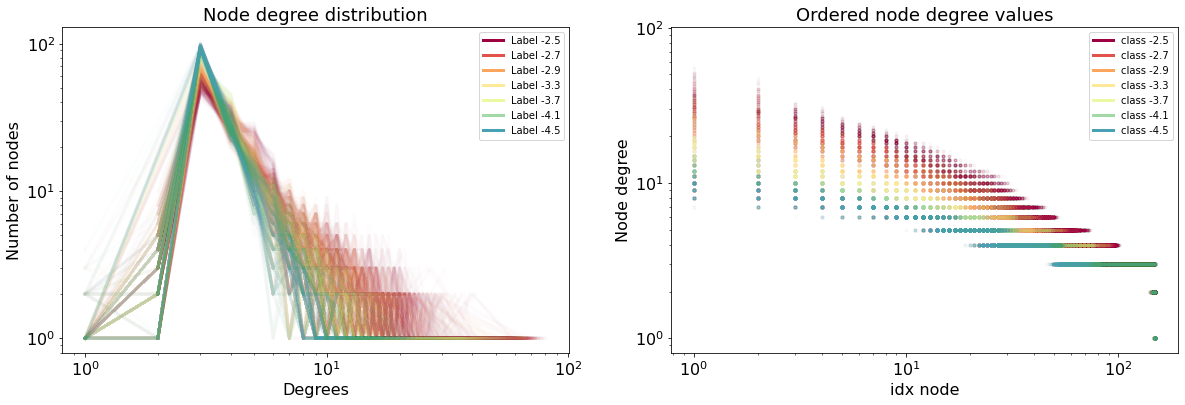

Plotting 2D or n>=2 embeddings...


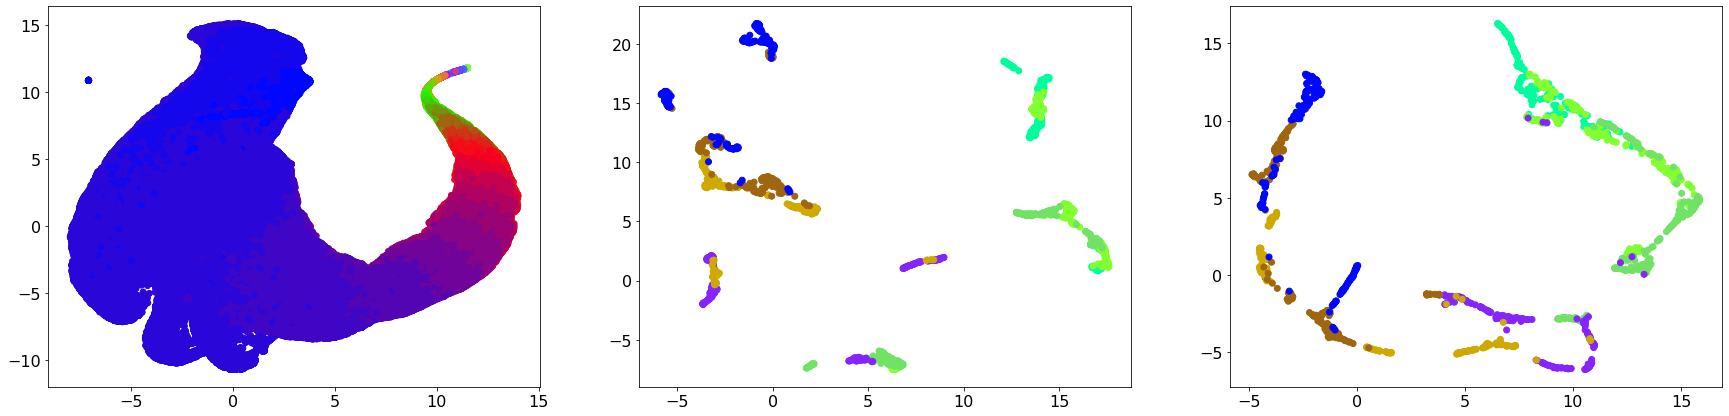

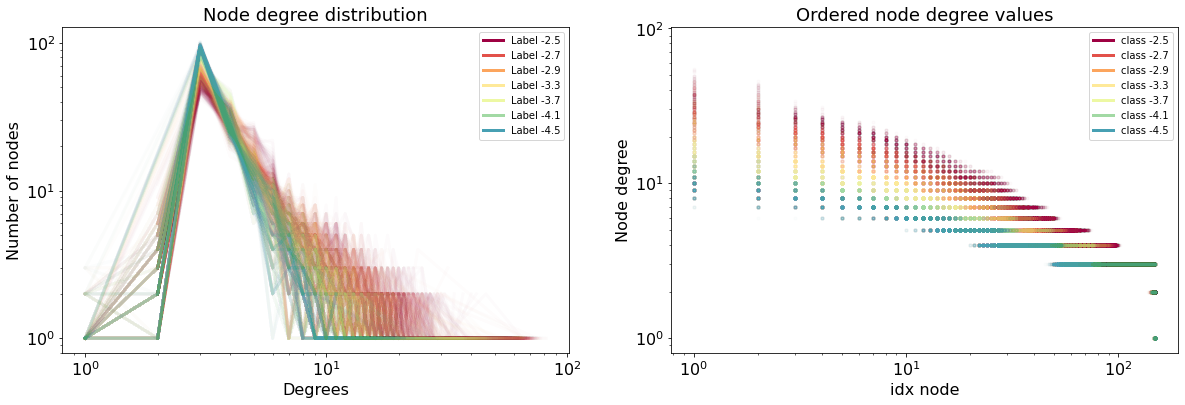

Plotting 2D or n>=2 embeddings...


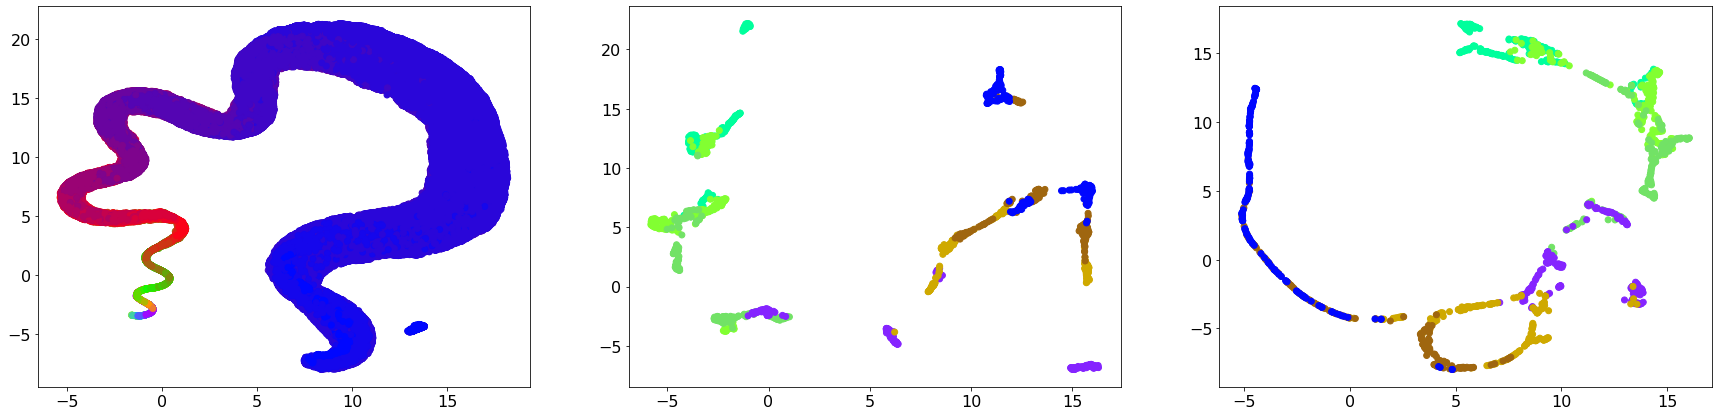

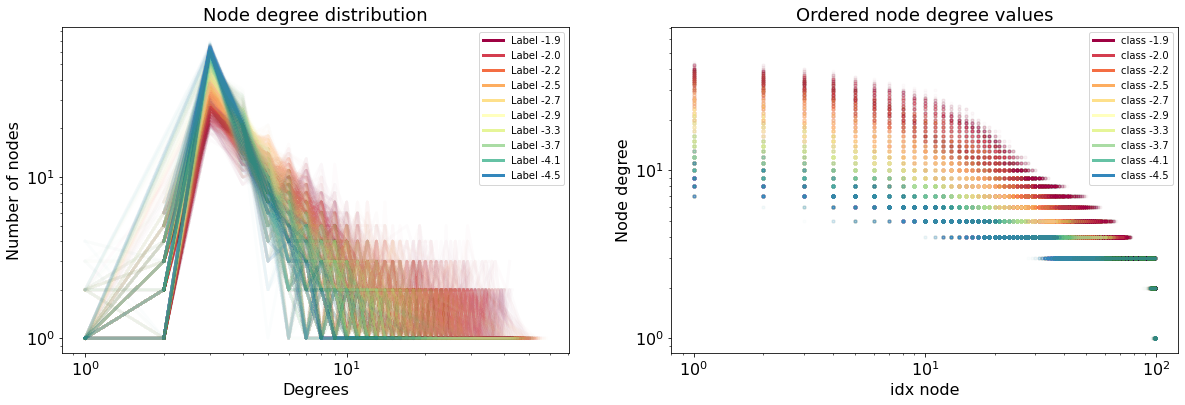

Plotting 2D or n>=2 embeddings...


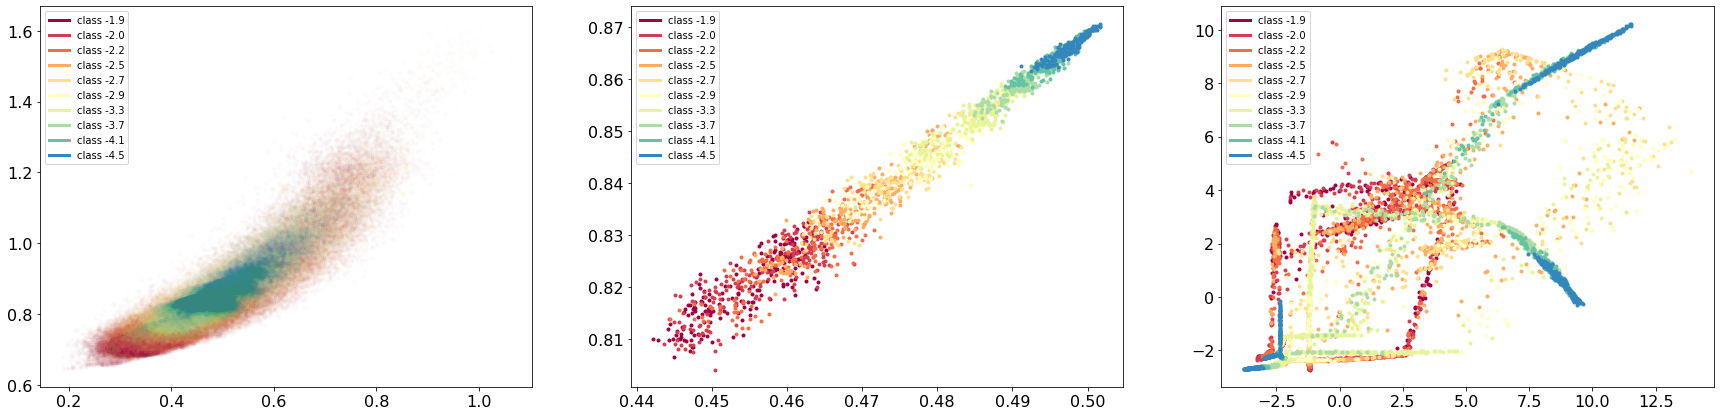

In [55]:
experiments.graph_embedding_per_epoch = xp.trainer.graph_embedding_per_epoch
experiments.node_embedding_per_epoch = xp.trainer.node_embedding_per_epoch
experiments.dataset = xp.trainer.dataset
experiments.loss_list = xp.trainer.test_loss_list
experiments.exp_config = xp.trainer.config_class
experiments.dataset_type = xp.trainer.gg.type
experiments.embedding_dimension = num_emb_neurons
my_log_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,500, 15)) + list(range(500, 5000, 40))
len(my_log_list)
nomefile = xp.make_video(skip=1, fromfiles=True, custom_list=my_log_list, seq_colors=True)

scatter_exp10_nodi450_grafi80_percent0.7_mode1_layers[1_64_32_2]_finaldenseTrue_freezedFalse


In [5]:
md(f'<img src={nomefile}.gif width="1200" align="center">')

<img src=scatter_exp10_nodi100_grafi400_percent0.7_mode1_layers[1_32_32_2]_finaldenseTrue_freezedFalse.gif width="1200" align="center">

In [73]:
md(f'<img src={nomefile}.gif width="1200" align="center">')

<img src=scatter_exp7_nodi450_grafi80_percent0.7_mode1_layers[1_64_32_2]_finaldenseTrue_freezedFalse.gif width="1200" align="center">

In [5]:
md(f'<img src={nomefile}.gif width="1200" align="center">')

<img src=scatter_exp10_nodi450_grafi80_percent0.7_mode1_layers[1_64_32_2]_finaldenseTrue_freezedFalse.gif width="1200" align="center">

# Studio al variare dei layer Linear, GCN freezed, per capire se veramente non serve addestrare la GNN e posso fare tutto con i Linear successivi
Pare di si -> allora per ottenere un risultato generale ripeto tante volte i training, magari trovando anche il minimo numero di neuroni e livelli Linear

In [2]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['ERmodel'] = False
c.conf['graph_dataset']['confmodel'] = True
c.conf['graph_dataset']['Num_nodes'] = [450]*10
c.conf['graph_dataset']['Num_grafi_per_tipo'] = 40
#c.conf['graph_dataset']['list_exponents'] = [-2.5, -2.7, -2.9, -3.3, -3.7, -4.1, -4.5]
c.conf['model']['GCNneurons_per_layer'] = [1, 64, 32, 2]
c.conf['model']['neurons_last_linear'] = [16, 16, 10]
#c.conf['training']['epochs'] = 20000
#c.conf['training']['learning_rate'] = 0.005
c.conf['training']['every_epoch_embedding'] = True

num_out_neurons = len(c.conf['graph_dataset']['list_exponents'])
diz_trials = {'model.neurons_last_linear': [[6, num_out_neurons], [10, num_out_neurons], [16, num_out_neurons], [32, num_out_neurons],
                                            [6, 6, num_out_neurons], [10, 10, num_out_neurons], [16, 16, num_out_neurons], [32, 32, num_out_neurons]]}

xp = Experiments(config_file, diz_trials=diz_trials, rootsave=rootsave, config_class=c)
#xp.just_train(parallel=True)
#embedding_class = xp.embedding()


0 configurazioni saltate su 8, farò 8 training


/home/daniele/Documenti/Progetti/Networks/Embednet/GridConfigurations.py:70: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_cum = df_cum.reset_index().drop(columns=['index'])


In [3]:
xp.GS_different_linear_layers()

Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:08<00:00, 44.70it/s]


Tempo impiegato: 9.01272439956665
Run 1


100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [18:09<00:00,  4.59it/s]


test accuracy finale: 0.9666666666666667
Run 2


 76%|████████████████████████████████████████████████████████                  | 3792/5000 [13:02<04:09,  4.84it/s]

Early stopping!!!
test accuracy finale: 0.9916666666666667
Run 3



100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [17:33<00:00,  4.75it/s]


test accuracy finale: 0.9916666666666667
Run 4


 57%|██████████████████████████████████████████▏                               | 2852/5000 [09:47<07:22,  4.85it/s]

Early stopping!!!
test accuracy finale: 0.9916666666666667
Run 5



 39%|████████████████████████████▊                                             | 1945/5000 [06:37<10:24,  4.89it/s]

Early stopping!!!
test accuracy finale: 0.9916666666666667
Run 6



100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [17:59<00:00,  4.63it/s]


test accuracy finale: 0.9916666666666667
Run 7


100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [18:28<00:00,  4.51it/s]


test accuracy finale: 0.9916666666666667
Run 8


100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [18:53<00:00,  4.41it/s]

test accuracy finale: 0.9916666666666667


In [6]:
xp.gc.config_dataframe#['risultati']

device graph_dataset                                                         \
     NaN       ERmodel regular confmodel    sbm continuous_p random_node_feat   
0    gpu         False   False      True  False        False            False   
1    gpu         False   False      True  False        False            False   
2    gpu         False   False      True  False        False            False   
3    gpu         False   False      True  False        False            False   
4    gpu         False   False      True  False        False            False   
5    gpu         False   False      True  False        False            False   
6    gpu         False   False      True  False        False            False   
7    gpu         False   False      True  False        False            False   

                                             \
                        list_p      range_p   
0  (0.3, 0.2, 0.1, 0.05, 0.01)  (0.01, 0.5)   
1  (0.3, 0.2, 0.1, 0.05, 0.01)  (0.01, 0.5)   
2  (0.3, 0.2, 0.1, 0.05, 0.01)  (0.01, 0.5)   
3  (0.3, 0.2, 0.1, 0.05, 0.01)  (0.01, 0.5)   
4  (0.3, 0.2, 0.1, 0.05, 0.01)  (0.01, 0.5)   
5  (0.3, 0.2, 0.1, 0.05, 0.01)  (0.01, 0.5)   
6  (0.3, 0.2, 0.1, 0.05, 0.01)  (0.01, 0.5)   
7  (0.3, 0.2, 0.1, 0.05, 0.01)  (0.01, 0.5)   

                                                      ...       model  \
                                     community_probs  ... put_dropout   
0  ([[0.25, 0.01], [0.01, 0.1]], [[0.4, 0.01], [0...  ...       False   
1  ([[0.25, 0.01], [0.01, 0.1]], [[0.4, 0.01], [0...  ...       False   
2  ([[0.25, 0.01], [0.01, 0.1]], [[0.4, 0.01], [0...  ...       False   
3  ([[0.25, 0.01], [0.01, 0.1]], [[0.4, 0.01], [0...  ...       False   
4  ([[0.25, 0.01], [0.01, 0.1]], [[0.4, 0.01], [0...  ...       False   
5  ([[0.25, 0.01], [0.01, 0.1]], [[0.4, 0.01], [0...  ...       False   
6  ([[0.25, 0.01], [0.01, 0.1]], [[0.4, 0.01], [0...  ...       False   
7  ([[0.25, 0.01], [0.01, 0.1]], [[0.4, 0.01], [0...  ...       False   

                                          logging  \
  node_features_dim init_weights train_step_print   
0                 1          eye             1000   
1                 1          eye             1000   
2                 1          eye             1000   
3                 1          eye             1000   
4                 1          eye             1000   
5                 1          eye             1000   
6                 1          eye             1000   
7                 1          eye             1000   

                                           risultati  \
                                           test_loss   
0  (0.019378594557444253, 0.019370615482330322, 0...   
1  (0.01905361215273539, 0.01905263066291809, 0.0...   
2  (0.01934477686882019, 0.019370011488596597, 0....   
3  (0.019393171866734824, 0.019366838534673057, 0...   
4  (0.019319862127304077, 0.019316267967224122, 0...   
5  (0.01912867824236552, 0.01913708249727885, 0.0...   
6  (0.019207741816838583, 0.019223904609680174, 0...   
7  (0.0193648358186086, 0.019391149282455444, 0.0...   

                                                                             \
                                       test_accuracy correlation_allclasses   
0  (0.10833333333333334, 0.10833333333333334, 0.1...                   None   
1  (0.24166666666666667, 0.13333333333333333, 0.1...                   None   
2  (0.13333333333333333, 0.13333333333333333, 0.0...                   None   
3  (0.09166666666666666, 0.09166666666666666, 0.0...                   None   
4  (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1833333333333...                   None   
5  (0.13333333333333333, 0.13333333333333333, 0.1...                   None   
6  (0.06666666666666667, 0.06666666666666667, 0.0...                   None   
7  (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.16666666...                   None   

                                              \
  tau_allclasses                        data   
0         

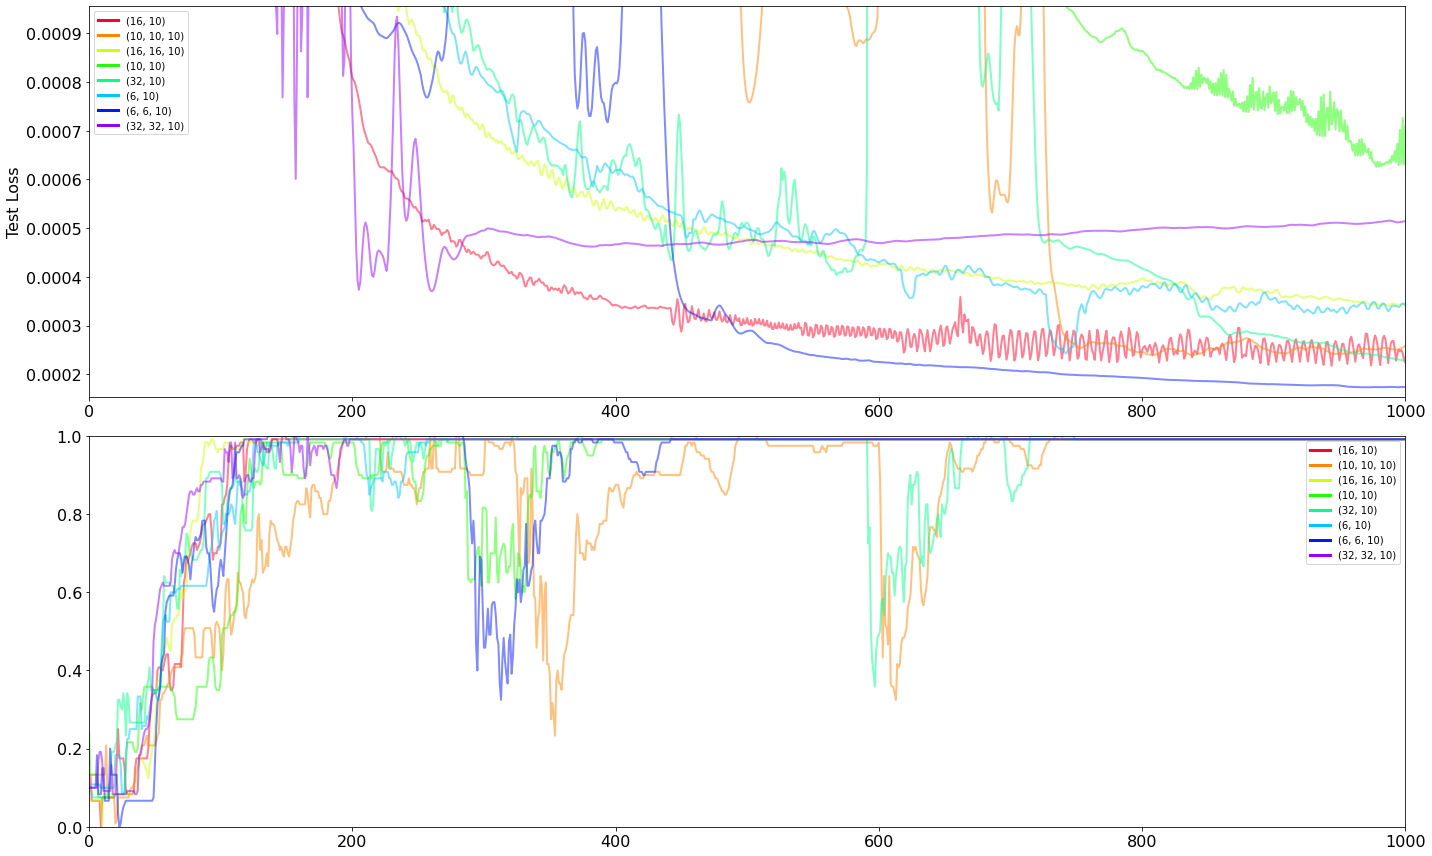

In [13]:
plot_onlyloss_ripetizioni_stesso_trial_superimposed(xp, 'model.neurons_last_linear', xlim=1000)

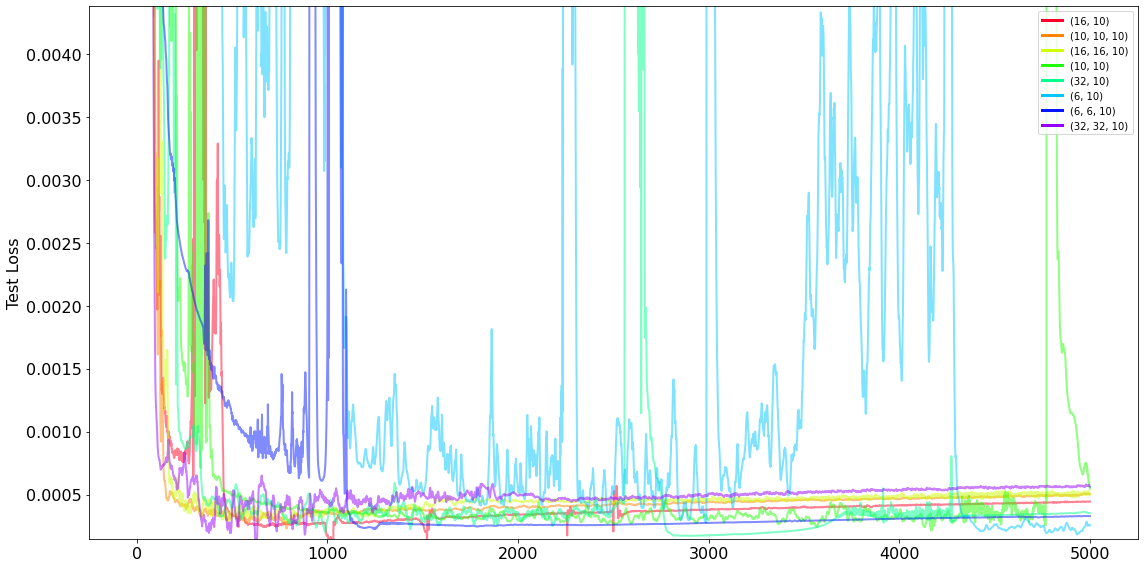

In [128]:
plot_onlyloss_ripetizioni_stesso_trial_superimposed(xp, 'model.neurons_last_linear')

##### SALVO IL DATAFRAME

In [9]:
df = xp.gc.config_dataframe
outfile = "output_data/df_configs_diversiLinear_gcn_freezed.pkl"
df.to_pickle(outfile)

In [40]:
experiments.graph_embedding_per_epoch = xp.trainer.graph_embedding_per_epoch
experiments.node_embedding_per_epoch = xp.trainer.node_embedding_per_epoch
experiments.dataset = xp.trainer.dataset
experiments.loss_list = xp.trainer.test_loss_list
experiments.exp_config = xp.trainer.config_class
experiments.dataset_type = xp.trainer.gg.type

num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
experiments.embedding_dimension = num_emb_neurons
my_log_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,500, 15)) + list(range(500, 5000, 40))
len(my_log_list)
nomefile = xp.make_video(skip=1, fromfiles=True, custom_list=my_log_list, seq_colors=True)

scatter_exp10_nodi450_grafi80_percent0.7_mode1_layers[1_64_32_2]_finaldenseTrue_freezedTrue


In [41]:
md(f'<img src={nomefile}.gif width="1200" align="center">')

<img src=scatter_exp10_nodi450_grafi80_percent0.7_mode1_layers[1_64_32_2]_finaldenseTrue_freezedTrue.gif width="1200" align="center">

### Ripeto tante volte il Linear più piccolo

In [10]:
config_file = "configurations/1layer_freezed.yml"
c = Config(config_file)
c.conf['graph_dataset']['ERmodel'] = False
c.conf['graph_dataset']['confmodel'] = True
c.conf['graph_dataset']['Num_nodes'] = [450]*10
c.conf['graph_dataset']['Num_grafi_per_tipo'] = 40
#c.conf['graph_dataset']['list_exponents'] = [-2.5, -2.7, -2.9, -3.3, -3.7, -4.1, -4.5]
c.conf['model']['GCNneurons_per_layer'] = [1, 64, 32, 2]
c.conf['model']['neurons_last_linear'] = [16, 16, 10]
c.conf['training']['epochs'] = 1000
#c.conf['training']['learning_rate'] = 0.005
c.conf['training']['every_epoch_embedding'] = True

num_out_neurons = len(c.conf['graph_dataset']['list_exponents'])
diz_trials = {'model.neurons_last_linear': [[6, num_out_neurons]]*10} 

xp = Experiments(config_file, diz_trials=diz_trials, rootsave=rootsave, config_class=c)

0 configurazioni saltate su 10, farò 10 training


/home/daniele/Documenti/Progetti/Networks/Embednet/GridConfigurations.py:70: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_cum = df_cum.reset_index().drop(columns=['index'])


In [11]:
xp.GS_different_linear_layers()

Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:09<00:00, 42.77it/s]


Tempo impiegato: 9.411881685256958
Run 1


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:40<00:00,  4.53it/s]


test accuracy finale: 1.0
Run 2


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:43<00:00,  4.48it/s]


test accuracy finale: 1.0
Run 3


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:37<00:00,  4.59it/s]


test accuracy finale: 1.0
Run 4


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:37<00:00,  4.59it/s]


test accuracy finale: 1.0
Run 5


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:42<00:00,  4.50it/s]


test accuracy finale: 1.0
Run 6


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:33<00:00,  4.68it/s]


test accuracy finale: 1.0
Run 7


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:28<00:00,  4.80it/s]


test accuracy finale: 1.0
Run 8


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:29<00:00,  4.77it/s]


test accuracy finale: 1.0
Run 9


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:29<00:00,  4.77it/s]


test accuracy finale: 1.0
Run 10


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [03:30<00:00,  4.76it/s]

test accuracy finale: 1.0


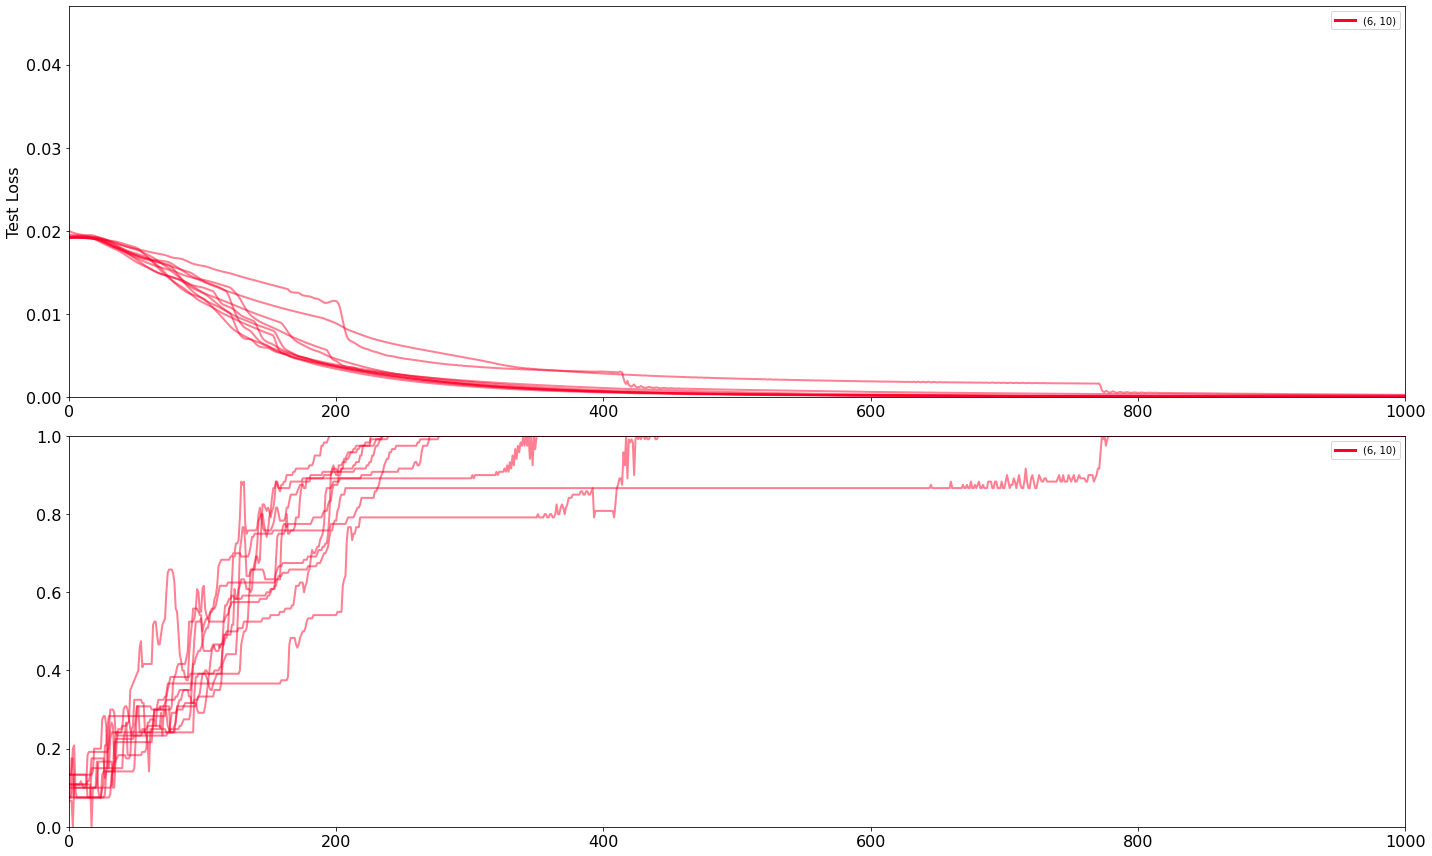

In [13]:
plot_onlyloss_ripetizioni_stesso_trial_superimposed(xp, 'model.neurons_last_linear', xlim=1000, ylim = (0,0.047))

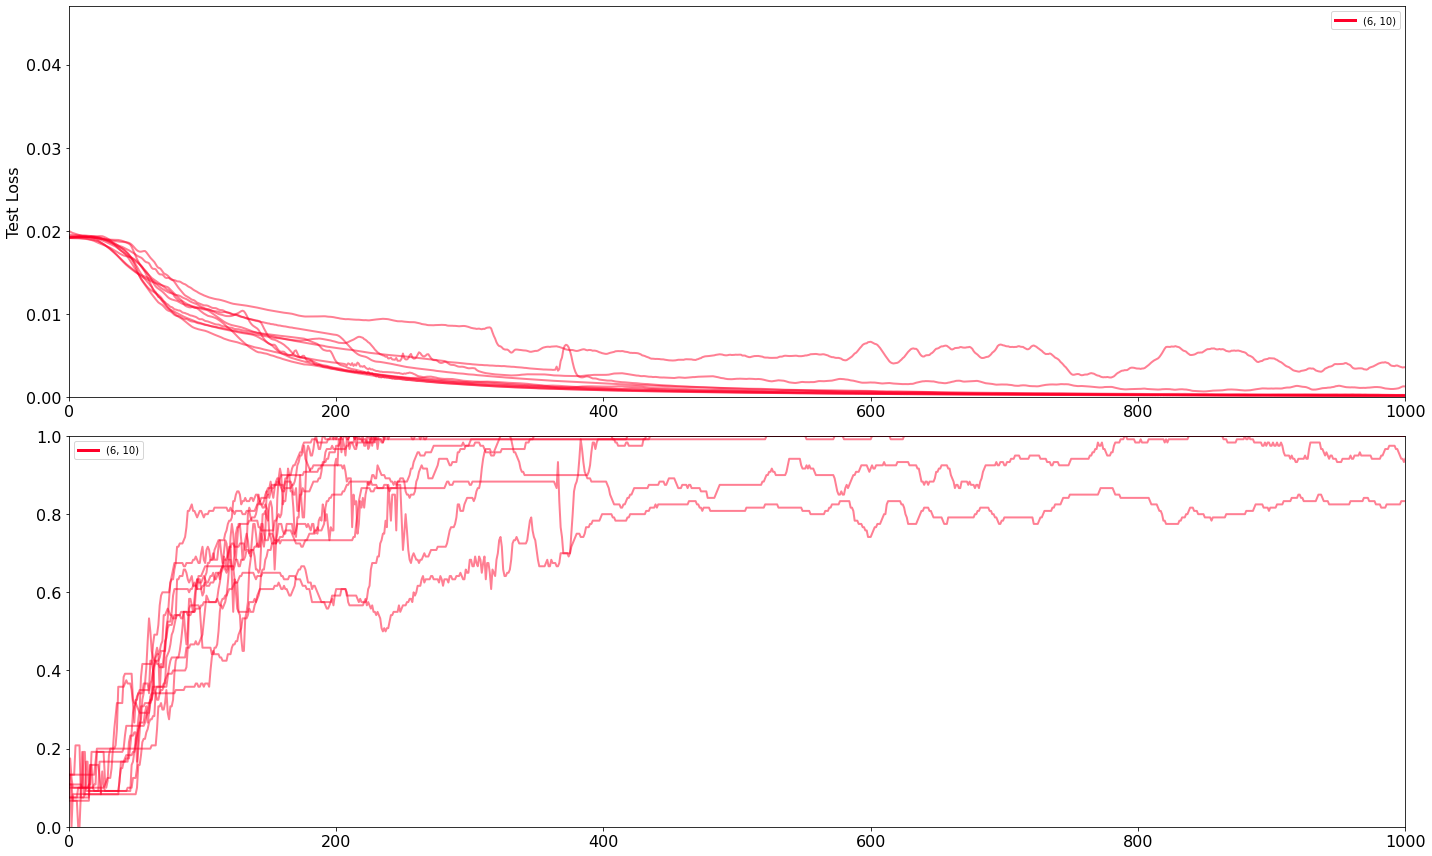

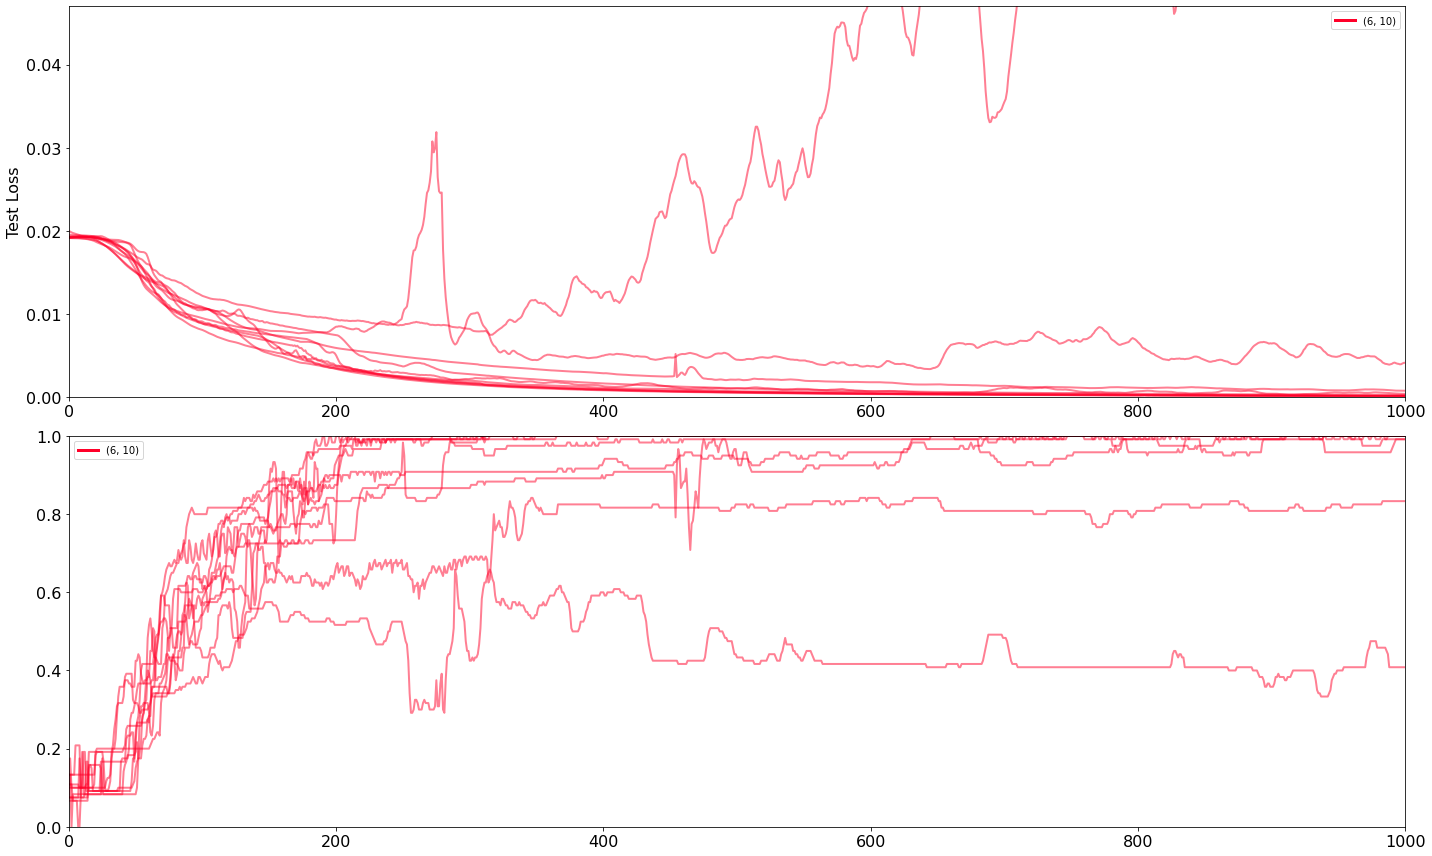

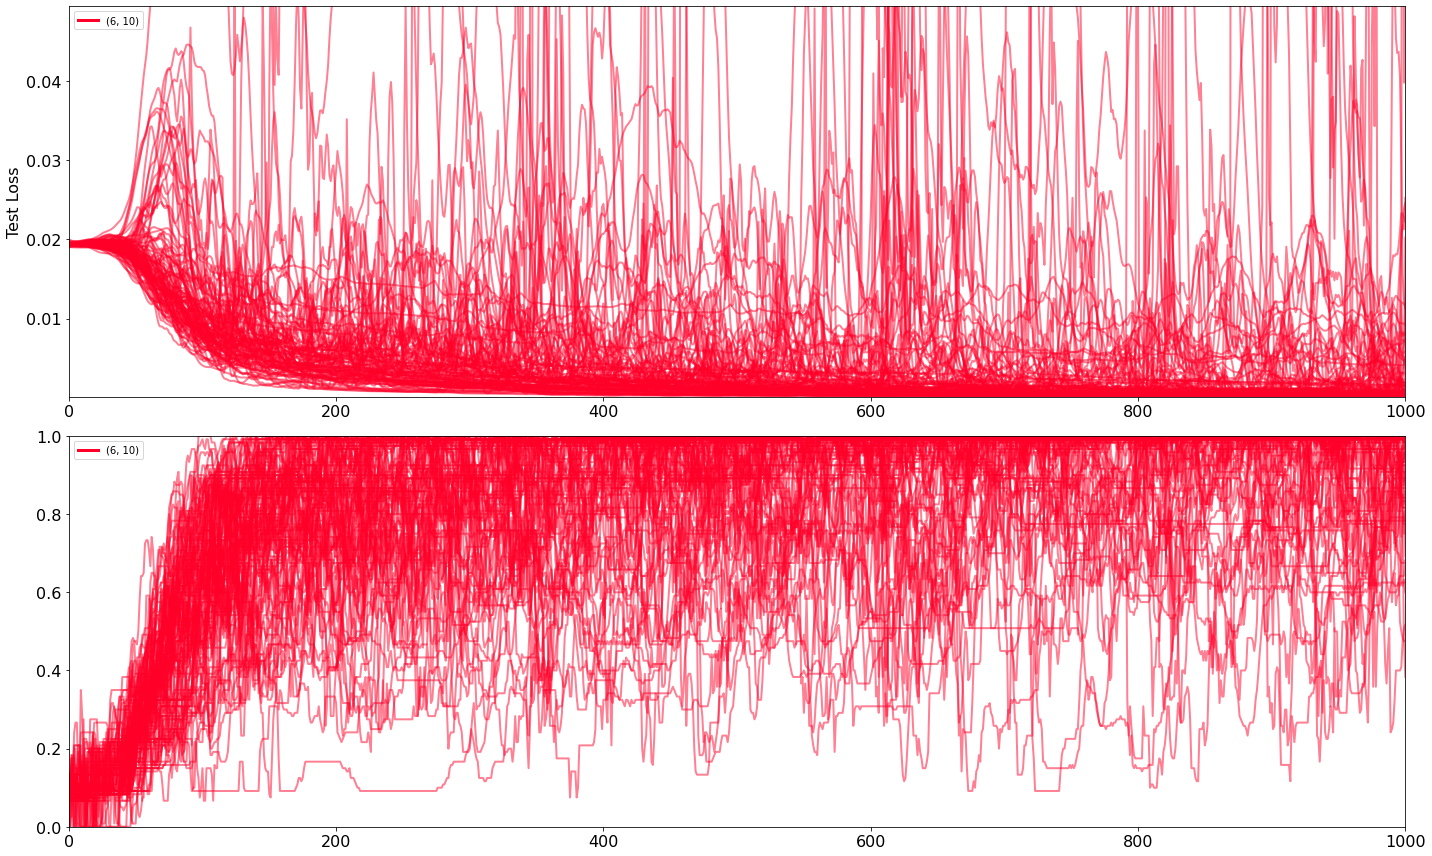

##### SALVO IL DATAFRAME

In [17]:
df = xp.gc.config_dataframe
outfile = "output_data/df_configs_Linear[6-out_neurons]_gcn_freezed.pkl"
df.to_pickle(outfile)

In [15]:
#plot_model(xp.trainer.model, xp.trainer.dataset.sample_dummy_data())

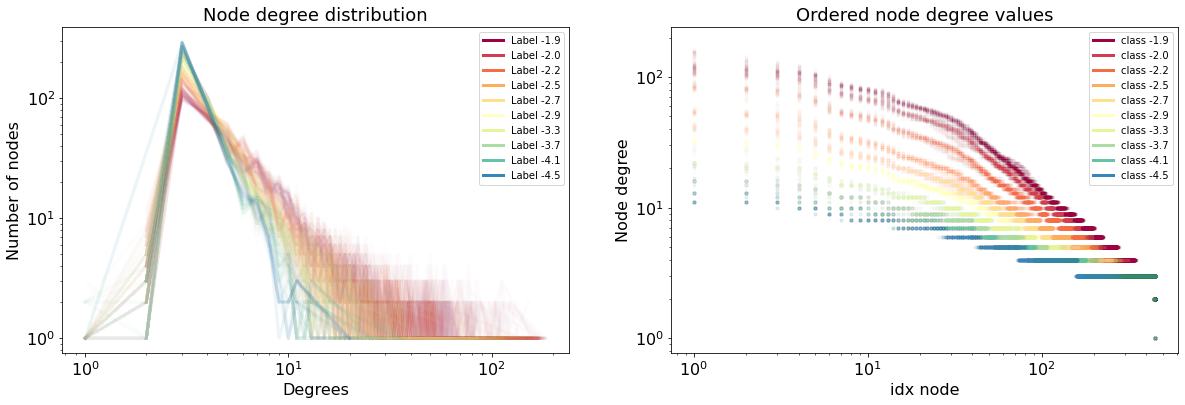

Plotting 2D or n>=2 embeddings...


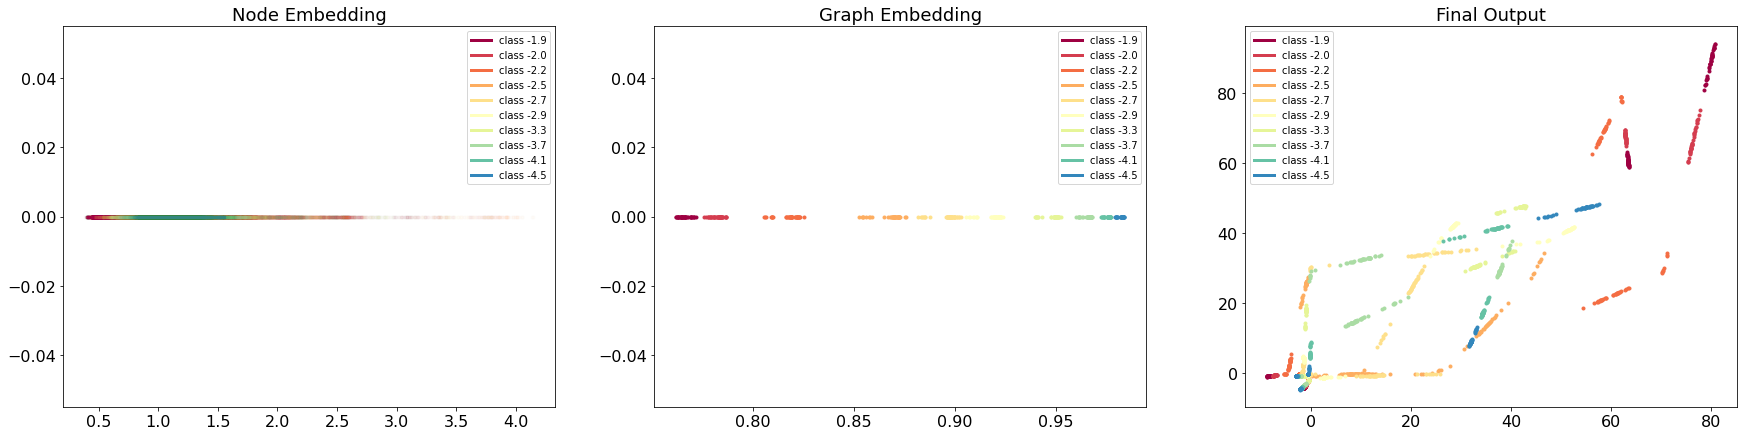

In [23]:
embedding_class = xp.embedding()
plot_data_degree_sequence(embedding_class.emb_perclass, log=True, sequential_colors=True)
num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
plot_metrics(embedding_class, num_emb_neurons, trainmode, sequential_colors=True)

In [18]:
experiments.graph_embedding_per_epoch = xp.trainer.graph_embedding_per_epoch
experiments.node_embedding_per_epoch = xp.trainer.node_embedding_per_epoch
experiments.dataset = xp.trainer.dataset
experiments.loss_list = xp.trainer.test_loss_list
experiments.exp_config = xp.trainer.config_class
experiments.dataset_type = xp.trainer.gg.type

num_emb_neurons = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
experiments.embedding_dimension = num_emb_neurons
my_log_list = my_log_lista=list(range(20)) + list(range(20,100,4)) + list(range(100,1000, 15))# + list(range(500, 5000, 40))
len(my_log_list)
nomefile = xp.make_video(skip=1, fromfiles=True, custom_list=my_log_list, seq_colors=True)

scatter_exp10_nodi450_grafi80_mode1_layers[1_64_32_2]-[6_10]_freezedTrue


In [19]:
md(f'<img src={nomefile}.gif width="1200" align="center">')

<img src=scatter_exp10_nodi450_grafi80_mode1_layers[1_64_32_2]-[6_10]_freezedTrue.gif width="1200" align="center">

# Nel caso in cui studio GCN freezed, proverei a prevedere la performance del downstream Linear solo usando l'overlap dell'embedding
https://docs.rapids.ai/api/cuml/stable/api.html#module-cuml.metrics.pairwise_distances

# Aligned UMAP per l'animazione dell'output layer

In [9]:
import umap.aligned_umap

In [37]:
outputs = np.array(xp.trainer.output_per_epoch)
slices = outputs[my_log_list]
len(slices), slices[0].shape

(117, (280, 7))

In [43]:
stride = 30
window_length=200
#slices = [outputs[stride * i:min(len(outputs), stride * i + window_length)] for i in range(10)]
#relation_dict = {i+stride:i for i in range(window_length-stride)}
relation_dict = {i:i for i in range(len(slices))}
relation_dicts = [relation_dict.copy() for i in range(len(slices) - 1)]

In [44]:
aligned_mapper = umap.AlignedUMAP().fit(slices, relations=relation_dicts)

/home/daniele/anaconda3/envs/pytorch-geom/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/daniele/anaconda3/envs/pytorch-geom/lib/python3.8/site-packages/umap/umap_.py:919: RuntimeWarning: overflow encountered in true_divide
  result[n_samples > 0] = float(n_epochs) / n_samples[n_samples > 0]


In [57]:
labels = embedding_class.get_unique_class_labels()
allgraph_class_labels = [emb.scalar_label  for emb_per_graph in embedding_class.emb_perclass for emb in emb_per_graph]

In [70]:
d = {v:i for i,v in enumerate(np.unique(np.array(allgraph_class_labels)))}
integers_allgraph_class_labels = [d[k] for k in allgraph_class_labels]

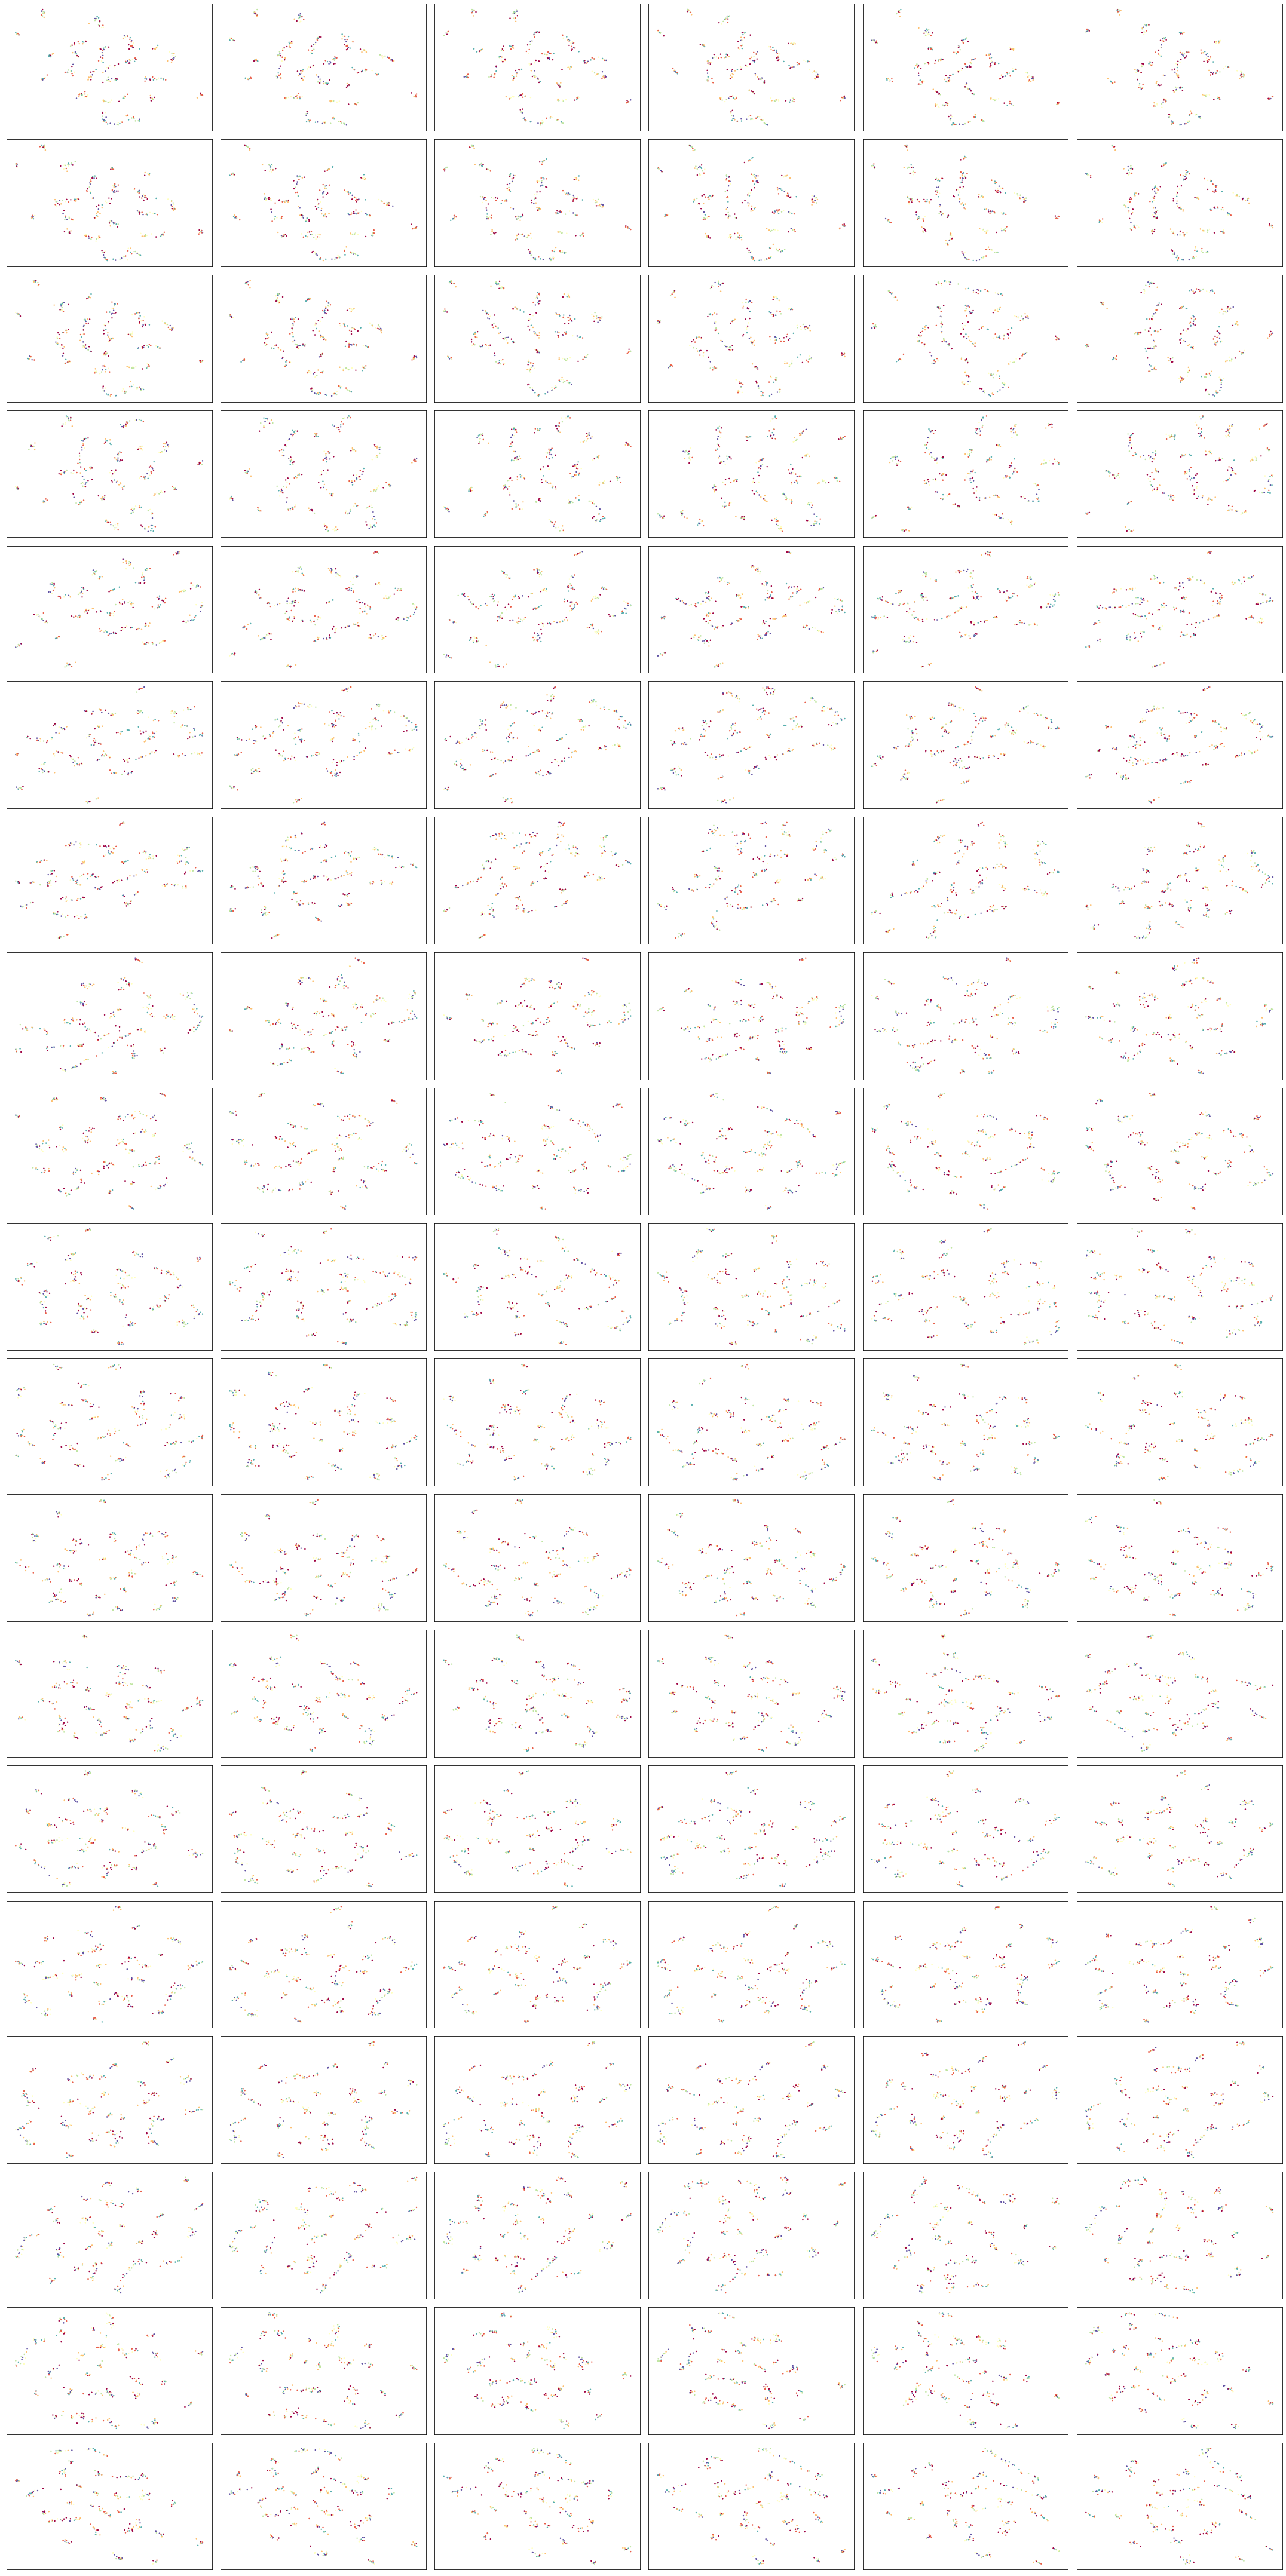

In [71]:
fig, axs = plt.subplots(len(slices)//6, 6, figsize=(30, 60))
#ax_bound = axis_bounds(np.vstack(aligned_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
    #current_target = ordered_target[150 * i:min(ordered_target.shape[0], 150 * i + 400)]
    # plot degli embedding di aligned UMAP
    ax.scatter(*aligned_mapper.embeddings_[i].T, s=2, c=integers_allgraph_class_labels, cmap="Spectral")
    #ax.axis(ax_bound)
    ax.set(xticks=[], yticks=[])
plt.tight_layout()

# Multiple histograms

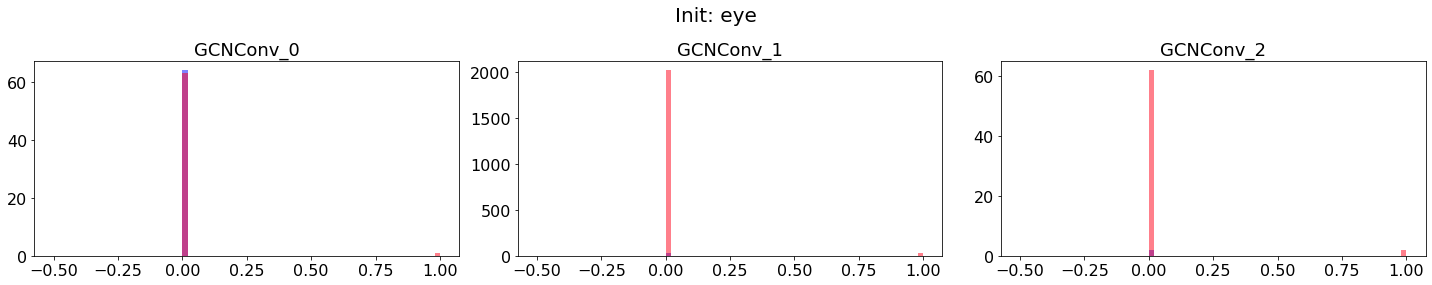

In [8]:
view_parameters(xp.trainer.model, verbose=False)

In [9]:
from models import get_param_labels, get_parameters
layers = get_parameters(xp.trainer.model.linears)
labels = get_param_labels(xp.trainer.model.linears)

In [19]:
len(xp.trainer.output_per_epoch)

5

In [20]:
layers = []
for lin in xp.trainer.model.linears:
    pars = []
    print(lin.__class__.__name__)
    for par in lin.parameters():
        par = par.detach().cpu().numpy()
        #print(par.flatten().shape)
        pars.extend(par.flatten())        
    print(len(pars))
    layers.append(pars)

Linear
96
Linear
1056
Linear
330


In [21]:
#plot_model(xp.trainer.model, xp.trainer.dataset.sample_dummy_data())

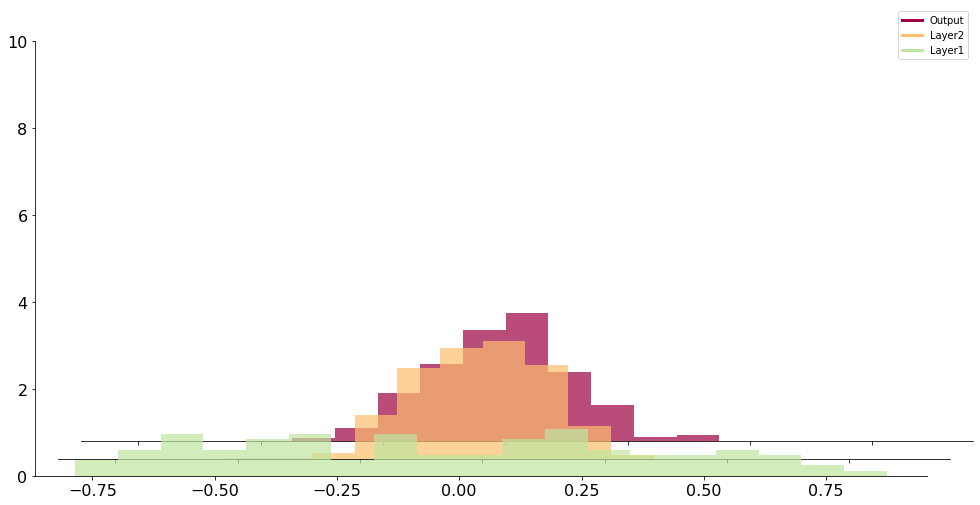

In [39]:
fig, ax1 = plt.subplots()
plot_weights_multiple_hist(layers[::-1], ['Output', 'Layer2', 'Layer1'], ax1, sequential_colors=True, subplot=111)

# Instrinsic Dimensionality Estimation

In [9]:
import skdim
#generate data : np.array (n_points x n_dim). Here a uniformly sampled 5-ball embedded in 10 dimensions
data = np.zeros((1000,10))
data[:,:5] = skdim.datasets.hyperBall(n = 1000, d = 5, radius = 1, random_state = 0)

In [5]:
danco = skdim.id.DANCo().fit(data)

In [6]:
twonn = skdim.id.TwoNN().fit(data)

In [7]:
danco.dimension_

5.167370787893128

In [8]:
twonn.dimension_

4.626589720639767

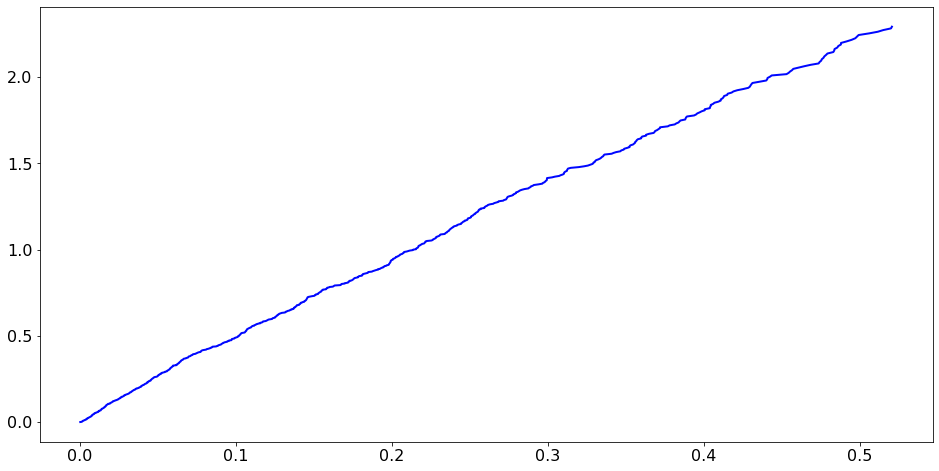

In [11]:
plt.plot(twonn.x_, twonn.y_)